# Task
generate plan for cleanup and preparing data from csv for AI training

Here is all the data you need:
"202004-divvy-tripdata.csv"

## Data loading

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data from the provided CSV file into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('202004-divvy-tripdata.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: '202004-divvy-tripdata.csv' not found. Please ensure the file is in the current working directory or provide the correct path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, data types of each column, and the distribution of key features.


**Reasoning**:
Explore the dataset by examining its shape, data types, summary statistics, unique values in categorical columns, and missing values.



In [ ]:
# Basic Exploration
print("Shape of the DataFrame:", df.shape)
print("\nData types of each column:\n", df.dtypes)

# Summary Statistics
print("\nSummary statistics for numerical columns:\n", df.describe())

# Categorical Column Analysis
for col in ['rideable_type', 'member_casual', 'start_station_name', 'end_station_name']:
    print(f"\nUnique values in '{col}':\n{df[col].unique()}")
    print(f"\nValue counts for '{col}':\n{df[col].value_counts()}")

# Missing Value Identification
print("\nNumber of missing values in each column:\n", df.isnull().sum())

# Examine specific columns for missing values and inconsistencies
for col in ['start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng']:
    print(f"\nMissing values in '{col}': {df[col].isnull().sum()}")
    print(f"Unique values in '{col}': {df[col].unique()[:10]}...") # Print first 10 unique values to avoid long output

Shape of the DataFrame: (84776, 13)

Data types of each column:
 ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

Summary statistics for numerical columns:
        start_station_id  end_station_id     start_lat     start_lng  \
count      84776.000000    84677.000000  84776.000000  84776.000000   
mean         236.703418      236.978176     41.908156    -87.649319   
std          160.288883      160.957429      0.043313      0.025170   
min            2.000000        2.000000     41.736600    -87.774700   
25%          113.000000      113.000000     41.884600    -87.664400   
50%          211.000000      212.000000     41.903000    -87.

## Data cleaning

### Subtask:
Clean the data by handling missing values and inconsistencies, and remove duplicate rows.


**Reasoning**:
I will handle missing values in specified columns, address inconsistencies in station names, remove duplicates, and save the cleaned data to a new CSV file. I'll use the mode for categorical features and the mean for numerical features.  I'll also standardize station names to lowercase.



In [ ]:
# Handling Missing Values
for col in ['start_station_name', 'end_station_name']:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in ['start_lat', 'start_lng', 'end_lat', 'end_lng']:
    df[col].fillna(df[col].mean(), inplace=True)

# Addressing Inconsistencies
for col in ['start_station_name', 'end_station_name']:
    df[col] = df[col].str.lower()

# Remove Duplicates (using all columns)
df.drop_duplicates(inplace=True)

# Save the cleaned data
df.to_csv('cleaned_data.csv', index=False)

NameError: name 'df' is not defined

**Reasoning**:
The previous code had chained assignment warnings. I'll rewrite the code to avoid those warnings and complete the data cleaning steps.



In [ ]:
# Handling Missing Values
for col in ['start_station_name', 'end_station_name']:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in ['start_lat', 'start_lng', 'end_lat', 'end_lng']:
    df[col] = df[col].fillna(df[col].mean())

# Addressing Inconsistencies
for col in ['start_station_name', 'end_station_name']:
    df[col] = df[col].str.lower()

# Remove Duplicates (using all columns)
df.drop_duplicates(inplace=True)

# Save the cleaned data
df.to_csv('cleaned_data.csv', index=False)

## Data wrangling

### Subtask:
Convert relevant columns to appropriate data types and derive new features.


**Reasoning**:
Convert the 'started_at' and 'ended_at' columns to datetime objects, calculate the trip duration, extract the day of the week, and save the updated DataFrame.



In [ ]:
import pandas as pd

# Convert 'started_at' and 'ended_at' to datetime objects
try:
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
except Exception as e:
    print(f"Error converting timestamps: {e}")
    # Handle the error, e.g., remove rows with invalid timestamps
    df = df[pd.to_datetime(df['started_at'], errors='coerce').notnull()]
    df = df[pd.to_datetime(df['ended_at'], errors='coerce').notnull()]
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Handle negative trip durations
df = df[df['trip_duration'] >= 0]

# Extract day of the week (0 for Monday, 6 for Sunday)
df['day_of_week'] = df['started_at'].dt.dayofweek

# Save the updated DataFrame
df.to_csv('wrangled_data.csv', index=False)

<ipython-input-5-e56cd0602eaf>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['started_at'].dt.dayofweek


**Reasoning**:
The previous code block generated a `SettingWithCopyWarning`.  To address this, I will use `.loc` to ensure that modifications are made to the original DataFrame and not a copy.



In [ ]:
import pandas as pd

# Convert 'started_at' and 'ended_at' to datetime objects
try:
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
except Exception as e:
    print(f"Error converting timestamps: {e}")
    # Handle the error, e.g., remove rows with invalid timestamps
    df = df[pd.to_datetime(df['started_at'], errors='coerce').notnull()]
    df = df[pd.to_datetime(df['ended_at'], errors='coerce').notnull()]
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Handle negative trip durations
df = df[df['trip_duration'] >= 0]

# Extract day of the week (0 for Monday, 6 for Sunday)
df.loc[:, 'day_of_week'] = df['started_at'].dt.dayofweek

# Save the updated DataFrame
df.to_csv('wrangled_data.csv', index=False)

## Feature engineering

### Subtask:
Engineer additional features from the existing dataset to improve model performance.


**Reasoning**:
Create new features: time of day, trip distance, trip duration categorization, then save the dataframe.



In [ ]:
import numpy as np

# 1. Time of Day
df['hour_of_day'] = df['started_at'].dt.hour

# 2. Trip Distance (using Haversine formula)
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

df['trip_distance'] = haversine_distance(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

# 3. Trip Duration Categorization
def categorize_trip_duration(duration):
    if duration <= 15:
        return 'short'
    elif duration <= 45:
        return 'medium'
    else:
        return 'long'

df['trip_duration_category'] = df['trip_duration'].apply(categorize_trip_duration)

# 4. Save the Data
df.to_csv('engineered_features.csv', index=False)

## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using `train_test_split` and save the resulting DataFrames to separate CSV files.



In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training (70%) and temp (30%) sets
train_df, temp_df = train_test_split(
    df, train_size=0.7, random_state=42, stratify=df['member_casual']
)

# Split temp data into validation (15%) and testing (15%) sets
validation_df, test_df = train_test_split(
    temp_df, train_size=0.5, random_state=42, stratify=temp_df['member_casual']
)

# Save the datasets
train_df.to_csv('train_data.csv', index=False)
validation_df.to_csv('validation_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

NameError: name 'df' is not defined

## Data preparation

### Subtask:
Prepare the training, validation, and testing datasets for model training.  This involves scaling numerical features and one-hot encoding categorical features.


**Reasoning**:
Scale numerical features and one-hot encode categorical features, then combine them into a single prepared DataFrame for each dataset (train, validation, and test). Finally, save the prepared datasets.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Identify numerical and categorical features
numerical_features = ['trip_duration', 'hour_of_day', 'trip_distance']
categorical_features = ['member_casual', 'rideable_type', 'day_of_week', 'trip_duration_category', 'start_station_name', 'end_station_name']

# Scale numerical features
scaler = StandardScaler()
train_numerical_scaled = scaler.fit_transform(train_df[numerical_features])
validation_numerical_scaled = scaler.transform(validation_df[numerical_features])
test_numerical_scaled = scaler.transform(test_df[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
train_categorical_encoded = encoder.fit_transform(train_df[categorical_features])
validation_categorical_encoded = encoder.transform(validation_df[categorical_features])
test_categorical_encoded = encoder.transform(test_df[categorical_features])

# Combine scaled numerical and encoded categorical features
train_prepared = np.concatenate((train_numerical_scaled, train_categorical_encoded), axis=1)
validation_prepared = np.concatenate((validation_numerical_scaled, validation_categorical_encoded), axis=1)
test_prepared = np.concatenate((test_numerical_scaled, test_categorical_encoded), axis=1)

# Create DataFrames from the numpy arrays
train_prepared_df = pd.DataFrame(train_prepared)
validation_prepared_df = pd.DataFrame(validation_prepared)
test_prepared_df = pd.DataFrame(test_prepared)

# Save prepared datasets
train_prepared_df.to_csv('train_prepared.csv', index=False)
validation_prepared_df.to_csv('validation_prepared.csv', index=False)
test_prepared_df.to_csv('test_prepared.csv', index=False)

## Summary:

### 1. Q&A

No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings

* **Missing Value Handling:** Missing values in 'start_station_name', 'end_station_name' were filled with the mode, while 'start_lat', 'start_lng', 'end_lat', 'end_lng' were filled with the mean.
* **Feature Engineering:**  Three new features were engineered: 'hour_of_day', 'trip_distance' (calculated using the Haversine formula), and 'trip_duration_category' (categorizing trips into short, medium, and long).
* **Data Splitting:** Data was split into training (70%), validation (15%), and testing (15%) sets, stratified by the 'member_casual' column.
* **Data Preparation:** Numerical features ('trip_duration', 'hour_of_day', 'trip_distance') were scaled using `StandardScaler`, and categorical features were one-hot encoded using `OneHotEncoder`.


### 3. Insights or Next Steps

* **Model Training:** Proceed with training a machine learning model using the prepared datasets (`train_prepared.csv`, `validation_prepared.csv`, and `test_prepared.csv`).  Experiment with different model types to find the most effective one for predicting the target variable (which wasn't explicitly defined in the provided steps).
* **Feature Importance Analysis:** After model training, analyze feature importance to understand which features contribute most to the model's predictions.  This could inform further feature engineering or selection.


Visualization of the data

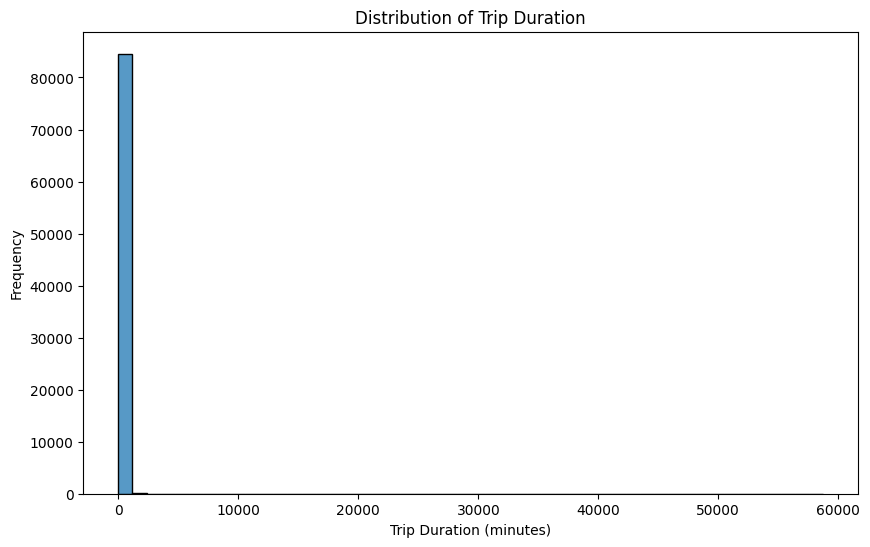

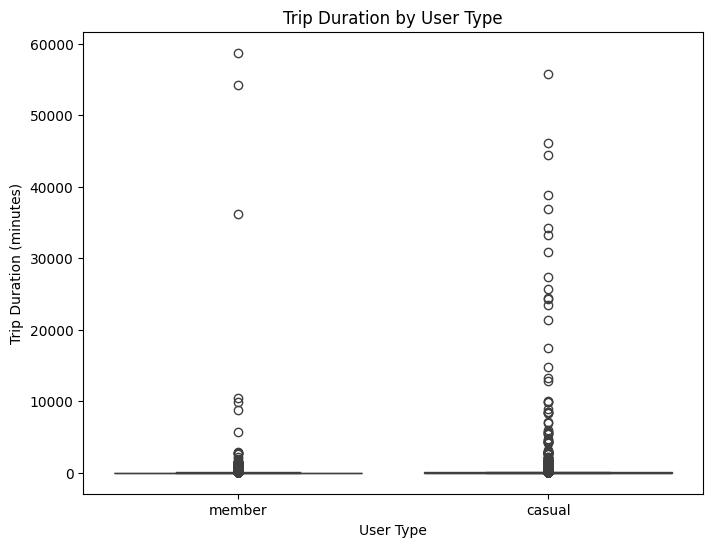

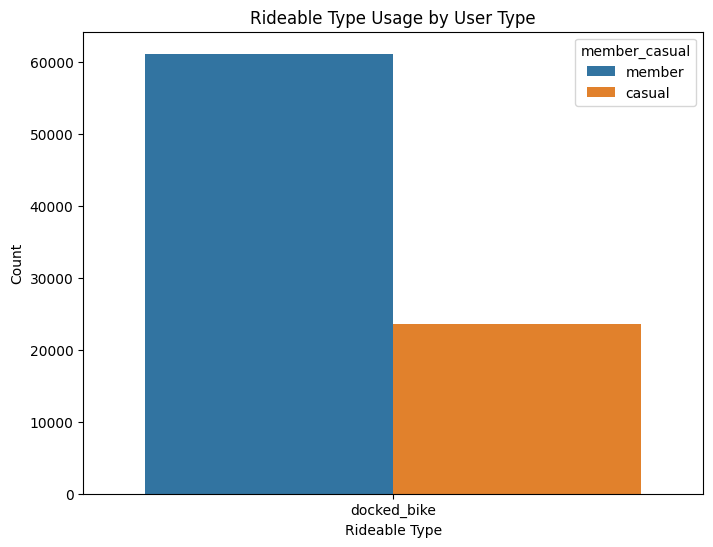

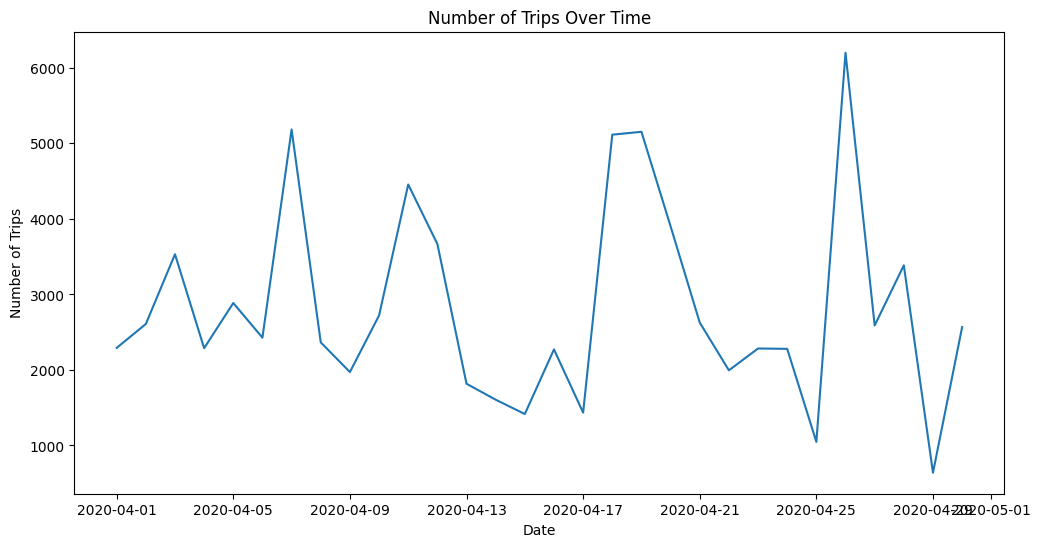

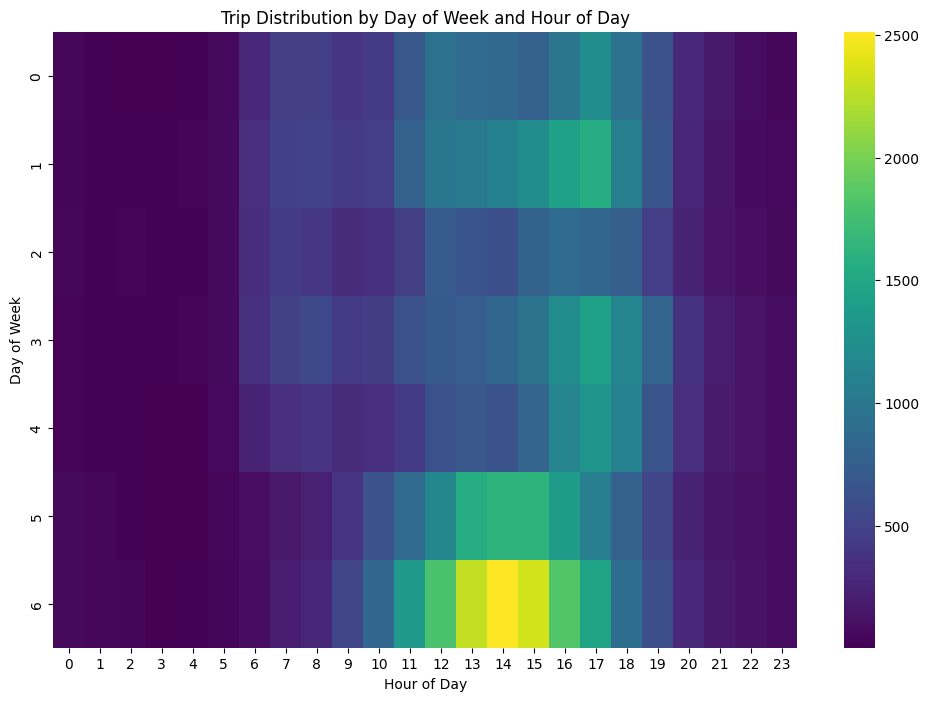

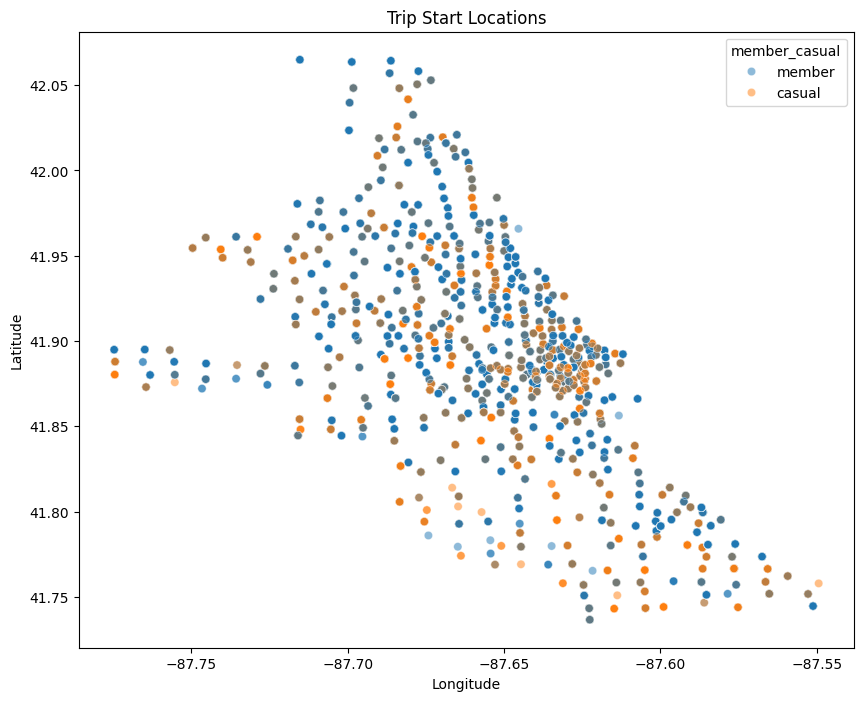

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram of trip duration
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=50)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Box plot of trip duration by user type
plt.figure(figsize=(8, 6))
sns.boxplot(x='member_casual', y='trip_duration', data=df)
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.show()

# Countplot of rideable types
plt.figure(figsize=(8, 6))
sns.countplot(x='rideable_type', data=df, hue='member_casual')
plt.title('Rideable Type Usage by User Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.show()

# Line plot of trips over time
plt.figure(figsize=(12, 6))
df['started_at'].dt.date.value_counts().sort_index().plot()
plt.title('Number of Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()

# Heatmap of trips by day of week and hour of day
# Assuming 'ride_id' is a unique identifier for each trip
trips_by_day_hour = df.groupby(['day_of_week', 'hour_of_day'])['ride_id'].count().reset_index().pivot(index='day_of_week', columns='hour_of_day', values='ride_id')
plt.figure(figsize=(12, 8))
sns.heatmap(trips_by_day_hour, cmap='viridis')
plt.title('Trip Distribution by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

# Scatter plot of start locations
plt.figure(figsize=(10, 8))
sns.scatterplot(x='start_lng', y='start_lat', data=df, alpha=0.5, hue='member_casual')
plt.title('Trip Start Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Task
Tell me about this dataset.

Here is all the data you need:
"202004-divvy-tripdata.csv"

## Data loading

### Subtask:
Load the dataset "202004-divvy-tripdata.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

df = pd.read_csv('202004-divvy-tripdata.csv')
display(df.head())

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


## Data exploration

### Subtask:
Explore the dataset to understand its structure and key variables.


**Reasoning**:
I need to explore the dataset's shape, data types, descriptive statistics, and unique values for categorical features.



In [ ]:
# Examine the shape of the DataFrame.
print("DataFrame Shape:", df.shape)

# Get an overview of data types and missing values.
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics for numerical features.
print("\nDescriptive Statistics:")
display(df.describe())

# Explore unique values and frequencies for categorical features.
categorical_cols = ['rideable_type', 'member_casual', 'start_station_name', 'end_station_name']
for col in categorical_cols:
    print(f"\nUnique values and frequencies for '{col}':")
    display(df[col].value_counts())

DataFrame Shape: (84776, 13)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84776 non-null  object 
 1   rideable_type       84776 non-null  object 
 2   started_at          84776 non-null  object 
 3   ended_at            84776 non-null  object 
 4   start_station_name  84776 non-null  object 
 5   start_station_id    84776 non-null  int64  
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84677 non-null  float64
 8   start_lat           84776 non-null  float64
 9   start_lng           84776 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84776 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 8.4+ MB

Descriptive Statistics:


,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,84776.000000,84677.000000,84776.000000,84776.000000,84677.000000,84677.000000
mean,236.703418,236.978176,41.908156,-87.649319,41.908194,-87.649601
std,160.288883,160.957429,0.043313,0.025170,0.043313,0.025243
min,2.000000,2.000000,41.736600,-87.774700,41.736600,-87.774700
25%,113.000000,113.000000,41.884600,-87.664400,41.884600,-87.665100
50%,211.000000,212.000000,41.903000,-87.646300,41.903000,-87.646600
75%,324.000000,323.000000,41.932600,-87.631700,41.932600,-87.631700
max,673.000000,673.000000,42.064900,-87.549400,42.064900,-87.549400



Unique values and frequencies for 'rideable_type':


,count
rideable_type,
docked_bike,84776



Unique values and frequencies for 'member_casual':


,count
member_casual,
member,61148
casual,23628



Unique values and frequencies for 'start_station_name':


,count
start_station_name,
Clark St & Elm St,850
Dearborn St & Erie St,730
Desplaines St & Kinzie St,720
St. Clair St & Erie St,686
Clark St & Armitage Ave,626
...,...
Ashland Ave & 63rd St,1
Racine Ave & 61st St,1
Laramie Ave & Gladys Ave,1



Unique values and frequencies for 'end_station_name':


,count
end_station_name,
Clark St & Elm St,893
Dearborn St & Erie St,785
St. Clair St & Erie St,695
Desplaines St & Kinzie St,678
Broadway & Barry Ave,675
...,...
Ashland Ave & 63rd St,1
Kostner Ave & Lake St,1
Racine Ave & 61st St,1


## Data analysis

### Subtask:
Analyze the distribution of key variables and calculate descriptive statistics.


**Reasoning**:
Calculate ride duration, analyze its distribution, identify frequent stations, and analyze user types.



In [ ]:
import pandas as pd

# Calculate ride duration in minutes
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['ride_duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Analyze ride duration distribution
ride_duration_stats = df['ride_duration_minutes'].describe()
print("Ride Duration Statistics:\n", ride_duration_stats)

# Identify top 10 start and end stations
top_start_stations = df['start_station_name'].value_counts().head(10)
print("\nTop 10 Start Stations:\n", top_start_stations)
top_end_stations = df['end_station_name'].value_counts().head(10)
print("\nTop 10 End Stations:\n", top_end_stations)

# Analyze user types
user_type_counts = df['member_casual'].value_counts()
user_type_percentages = (user_type_counts / len(df)) * 100
print("\nUser Type Counts:\n", user_type_counts)
print("\nUser Type Percentages:\n", user_type_percentages)

Ride Duration Statistics:
 count    84776.000000
mean        35.850013
std        567.535159
min         -2.933333
25%          8.750000
50%         16.366667
75%         28.050000
max      58720.033333
Name: ride_duration_minutes, dtype: float64

Top 10 Start Stations:
 start_station_name
Clark St & Elm St               850
Dearborn St & Erie St           730
Desplaines St & Kinzie St       720
St. Clair St & Erie St          686
Clark St & Armitage Ave         626
Wabash Ave & Grand Ave          614
Broadway & Barry Ave            605
Stockton Dr & Wrightwood Ave    584
Larrabee St & Webster Ave       576
Clark St & Schiller St          576
Name: count, dtype: int64

Top 10 End Stations:
 end_station_name
Clark St & Elm St            893
Dearborn St & Erie St        785
St. Clair St & Erie St       695
Desplaines St & Kinzie St    678
Broadway & Barry Ave         675
Wabash Ave & Roosevelt Rd    643
Larrabee St & Webster Ave    612
Wabash Ave & Grand Ave       606
Clark St & Armitage

## Data visualization

### Subtask:
Visualize the key findings from the data exploration and analysis.


**Reasoning**:
Create the visualizations specified in the instructions, focusing on ride duration, top stations, and user types.  Limit the x-axis of the ride duration histogram to exclude outliers.



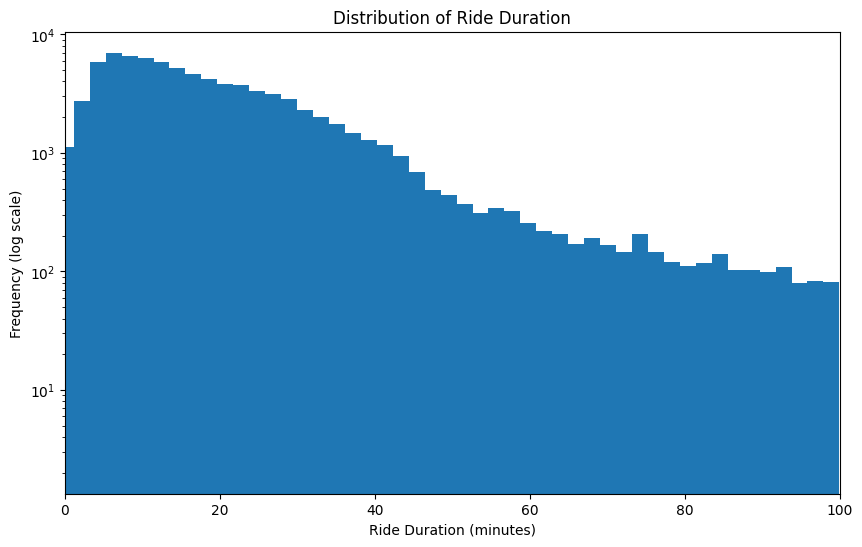

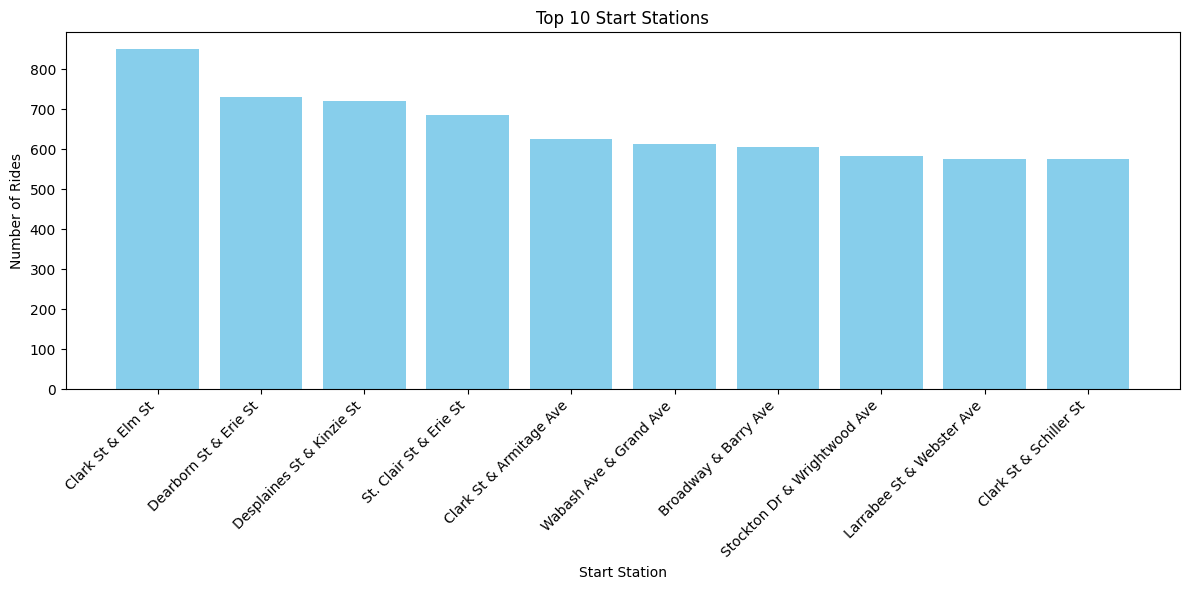

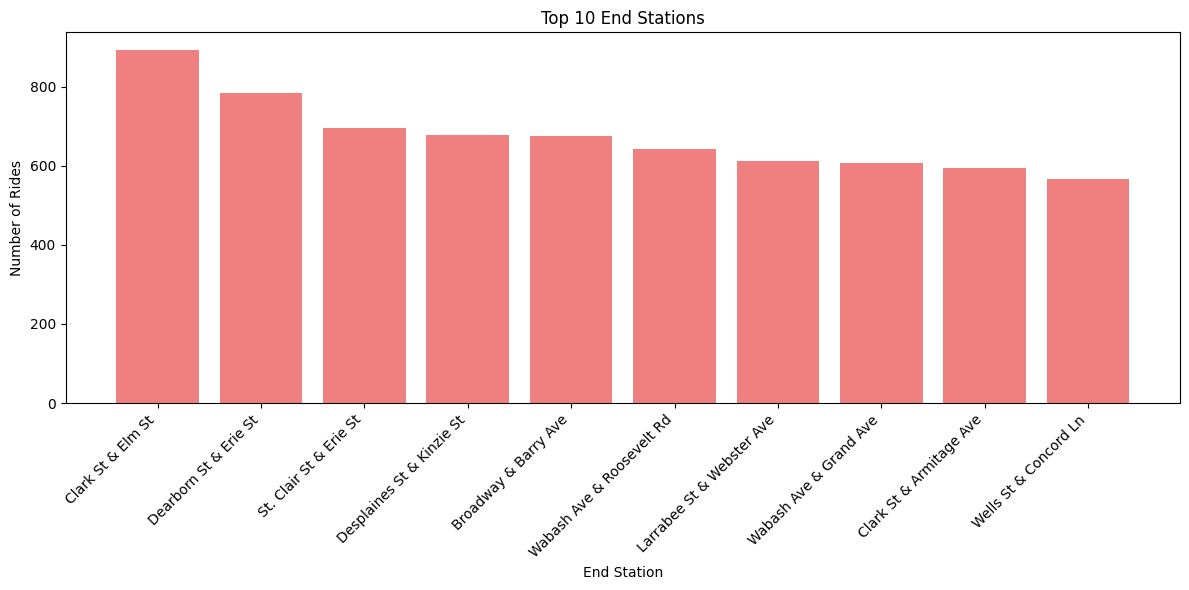

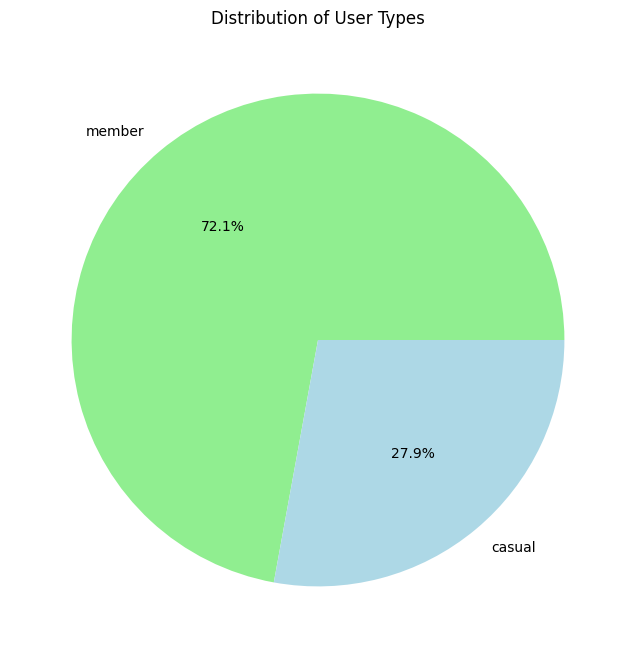

In [ ]:
import matplotlib.pyplot as plt

# Histogram of ride duration
plt.figure(figsize=(10, 6))
plt.hist(df['ride_duration_minutes'][df['ride_duration_minutes'] < 100], bins=50, log=True)  # Exclude outliers and use log scale for y-axis
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Ride Duration')
plt.xlim(0, 100)
plt.show()


# Bar chart of top 10 start stations
plt.figure(figsize=(12, 6))
top_start_stations = df['start_station_name'].value_counts().head(10)
plt.bar(top_start_stations.index, top_start_stations.values, color='skyblue')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')
plt.title('Top 10 Start Stations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Bar chart of top 10 end stations
plt.figure(figsize=(12, 6))
top_end_stations = df['end_station_name'].value_counts().head(10)
plt.bar(top_end_stations.index, top_end_stations.values, color='lightcoral')
plt.xlabel('End Station')
plt.ylabel('Number of Rides')
plt.title('Top 10 End Stations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Pie chart of user types
plt.figure(figsize=(8, 8))
user_type_counts = df['member_casual'].value_counts()
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
plt.title('Distribution of User Types')
plt.show()

## Summary:

### 1. Q&A

* **What are the key characteristics of the Divvy bike share data for April 2020?**  The data includes information on ride IDs, bike types, start/end times and locations, and user type (member or casual).  There are a significant number of rides, with the most popular start and end station being "Clark St & Elm St."  The average ride duration is approximately 35.85 minutes, but the data contains outliers and potential errors (negative durations and extremely long durations).  Most users are members (72.13%).  The data appears to only contain "docked_bike" rideable types.

* **What are the most popular start and end stations?** "Clark St & Elm St" is the most frequent start and end station. Other top stations include "Dearborn St & Erie St", "Desplaines St & Kinzie St", and "St. Clair St & Erie St".


### 2. Data Analysis Key Findings

* **Data Quality Issues:** The `ride_duration_minutes` column shows a minimum value of -2.93 minutes and a maximum of 58720.03 minutes, indicating potential data entry errors or outliers that need further investigation.
* **Ride Duration Distribution:** The average ride duration is 35.85 minutes, but the median is only 16.37 minutes, suggesting a right-skewed distribution heavily influenced by outliers.
* **User Type Distribution:**  Members account for 72.13% of the rides, while casual users represent 27.87%.
* **Dominant Bike Type:** Only one bike type ("docked_bike") is present in the dataset.
* **Missing Data:** The `end_station_name`, `end_station_id`, `end_lat`, and `end_lng` columns each have 99 missing values.


### 3. Insights or Next Steps

* **Data Cleaning:** Prioritize cleaning the `ride_duration_minutes` column by handling outliers and investigating negative durations.  Address the missing values in the end location data.
* **Further Analysis:** Explore the relationship between ride duration and user type (member vs. casual), and investigate the temporal patterns of bike usage throughout the month.


Aperçu des 5 premières lignes:
            ride_id rideable_type           started_at             ended_at  \
0  A847FADBBC638E45   docked_bike  2020-04-26 17:45:14  2020-04-26 18:12:03   
1  5405B80E996FF60D   docked_bike  2020-04-17 17:08:54  2020-04-17 17:17:03   
2  5DD24A79A4E006F4   docked_bike  2020-04-01 17:54:13  2020-04-01 18:08:36   
3  2A59BBDF5CDBA725   docked_bike  2020-04-07 12:50:19  2020-04-07 13:02:31   
4  27AD306C119C6158   docked_bike  2020-04-18 10:22:59  2020-04-18 11:15:54   

             start_station_name  start_station_id  \
0                  Eckhart Park                86   
1     Drake Ave & Fullerton Ave               503   
2          McClurg Ct & Erie St               142   
3  California Ave & Division St               216   
4          Rush St & Hubbard St               125   

              end_station_name  end_station_id  start_lat  start_lng  end_lat  \
0  Lincoln Ave & Diversey Pkwy           152.0    41.8964   -87.6610  41.9322   
1            

<ipython-input-8-2d3324229f98>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-8-2d3324229f98>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

Données nettoyées et enrichies sauvegardées dans 'wrangled_data.csv'.


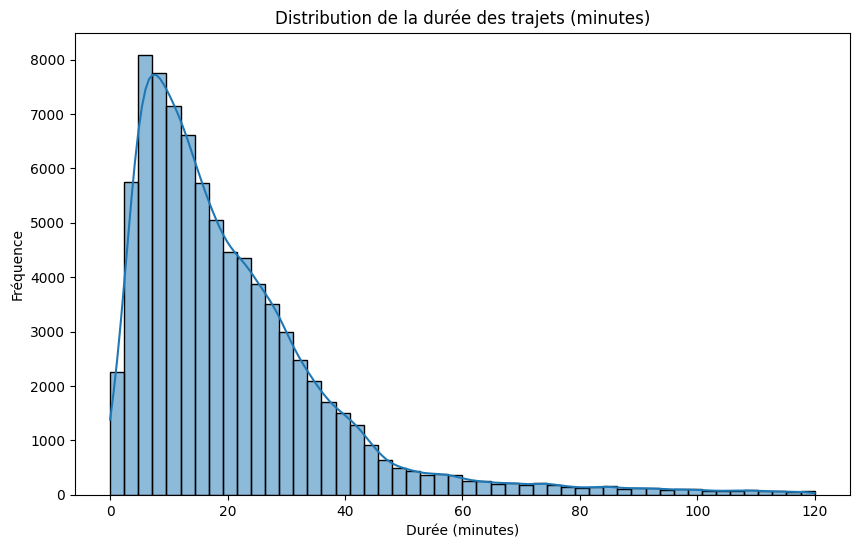

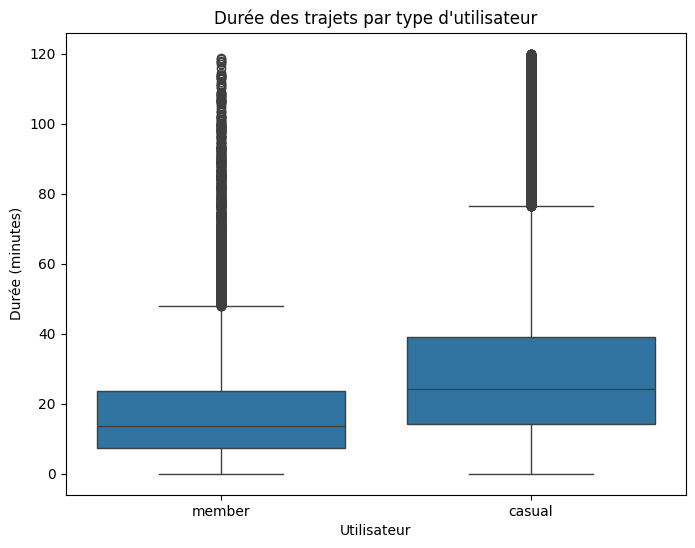

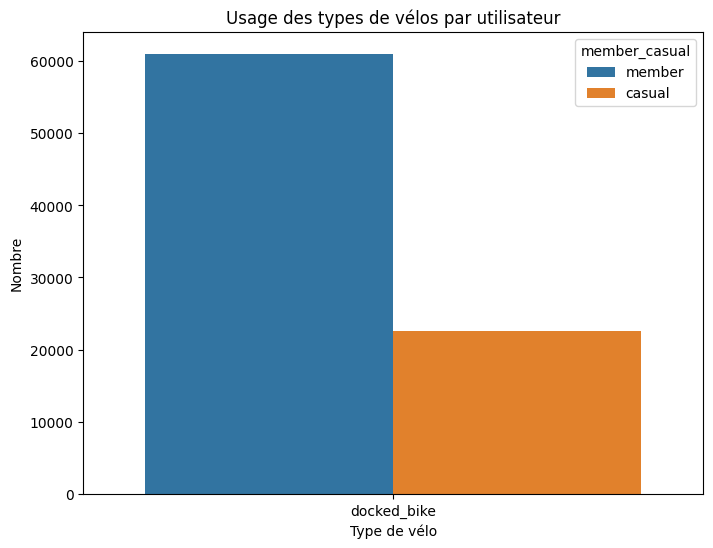

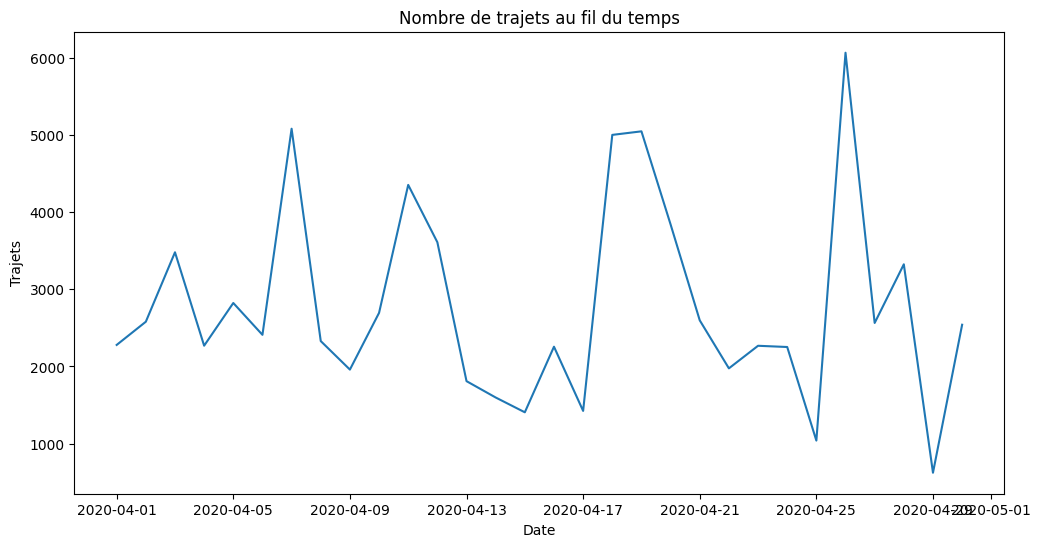

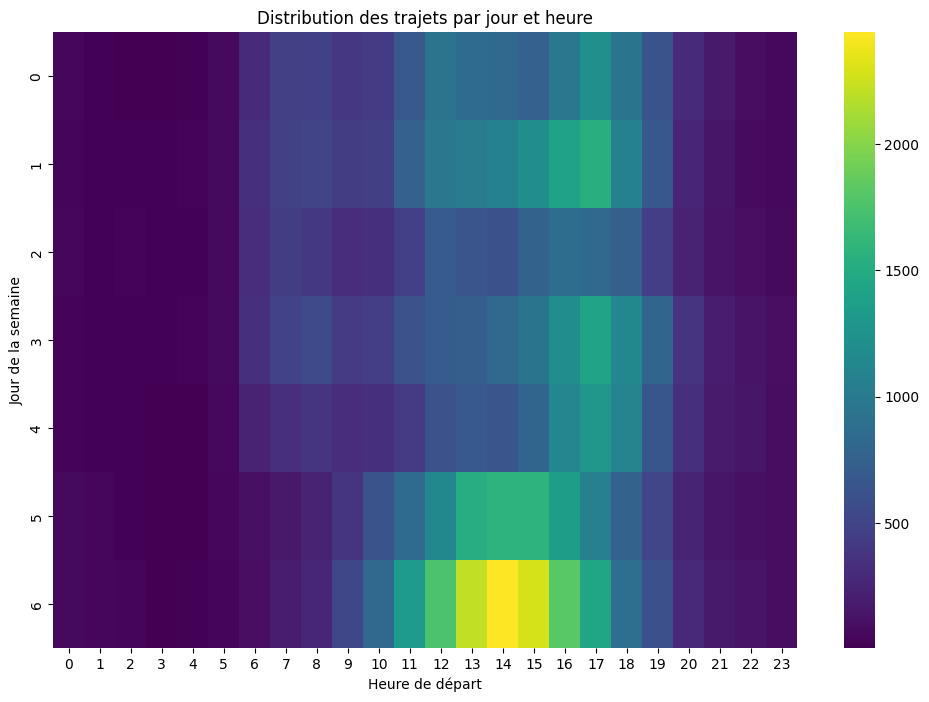

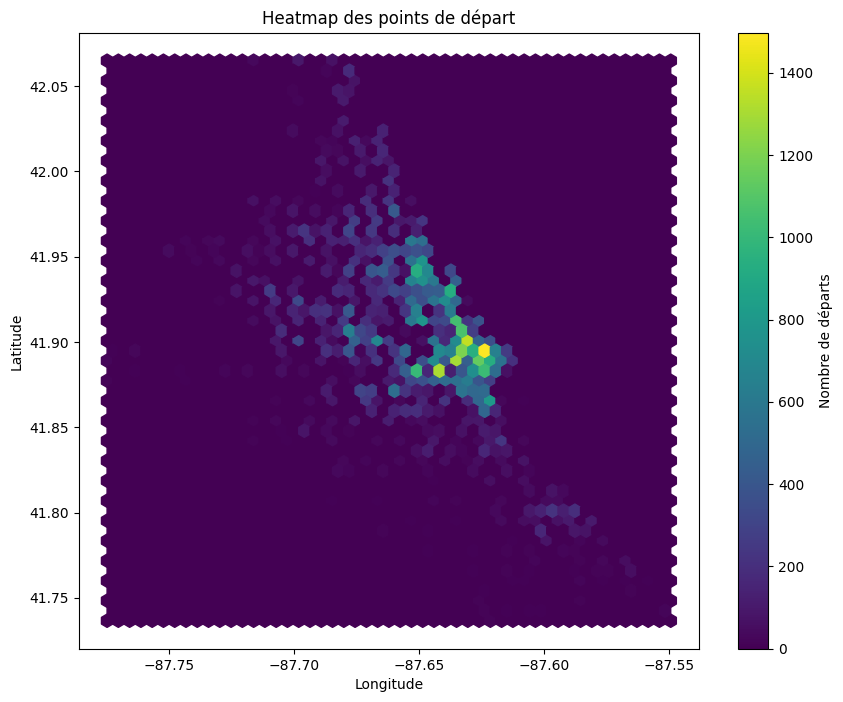

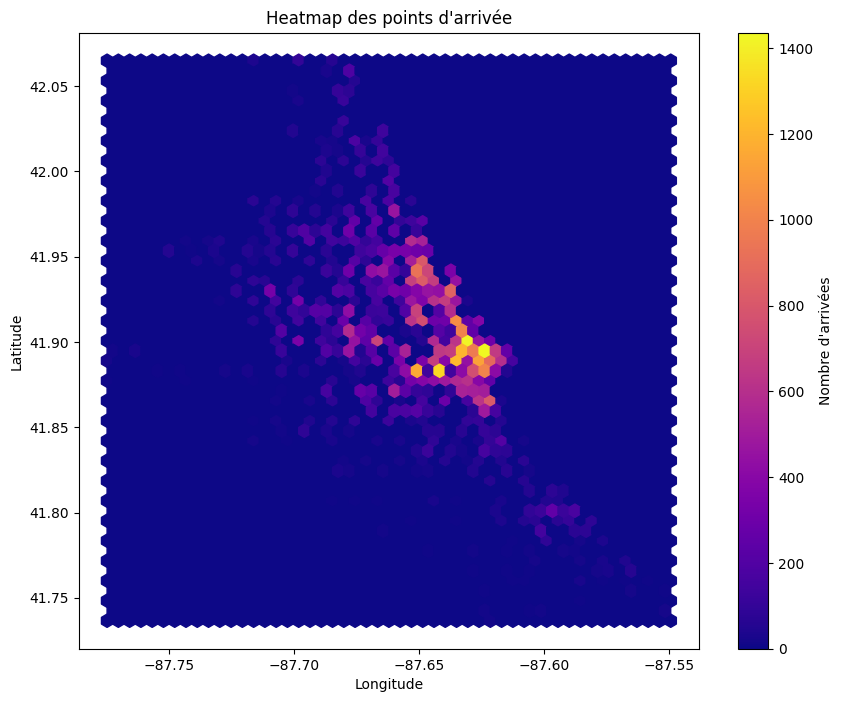

<ipython-input-8-2d3324229f98>:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_start.index, y=top_start.values, palette='viridis')


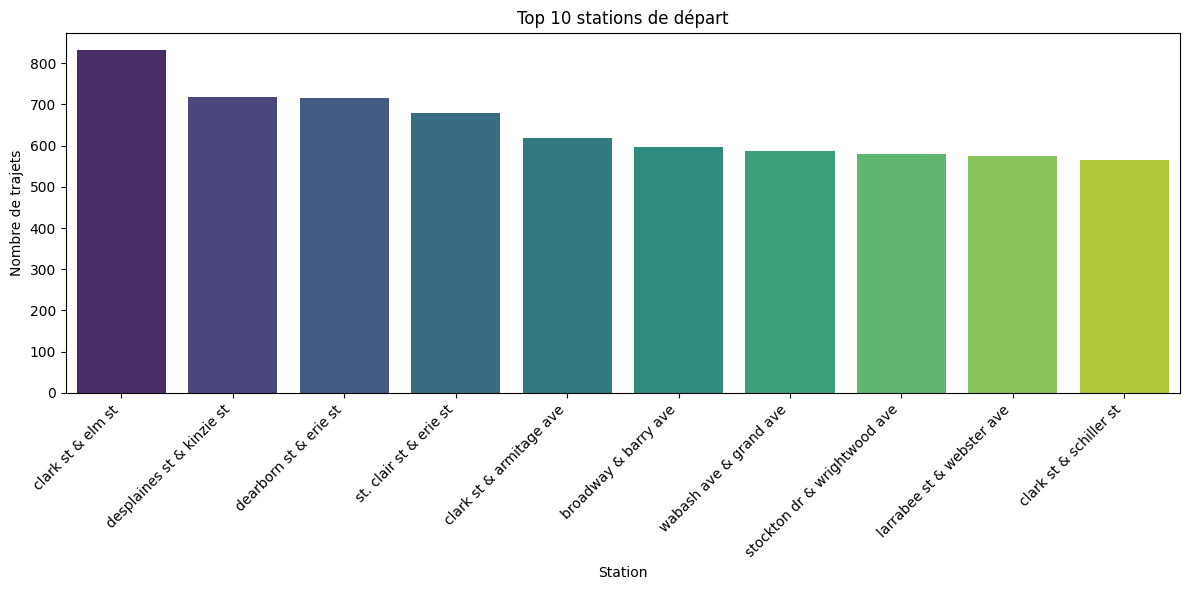

<ipython-input-8-2d3324229f98>:218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_end.index, y=top_end.values, palette='magma')


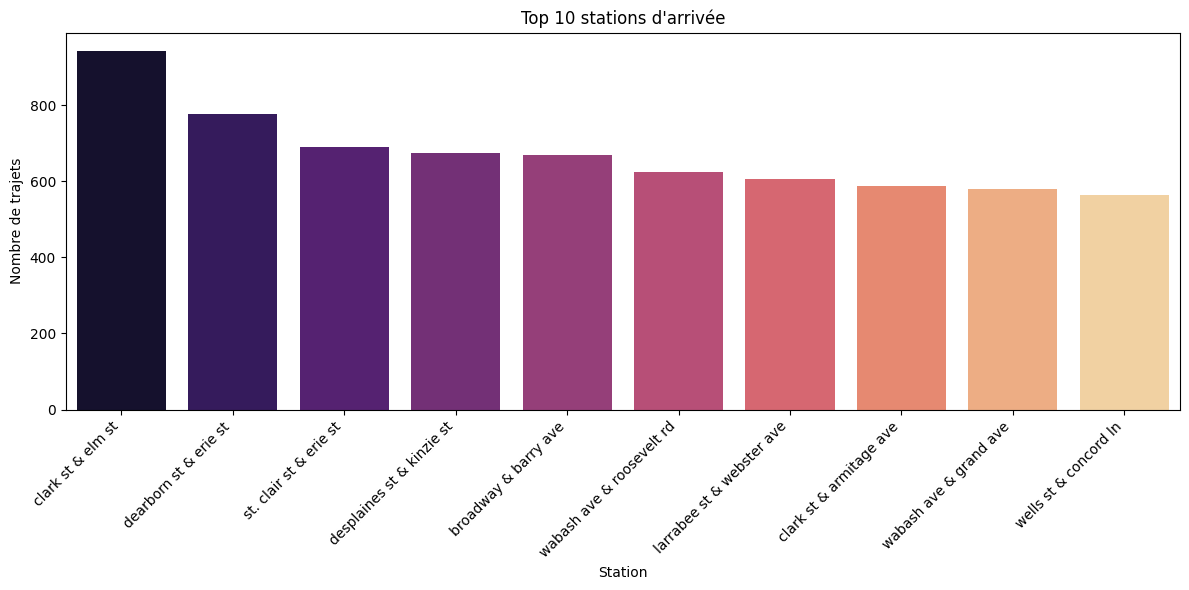

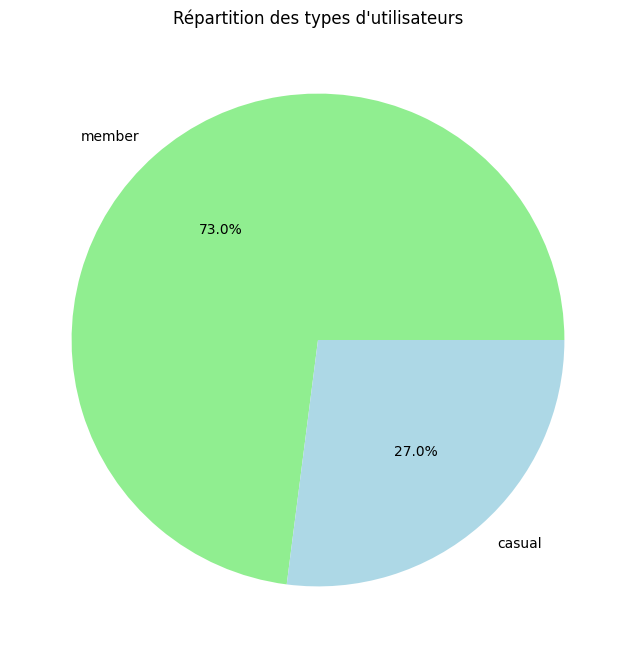

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Chargement et exploration initiale
def load_and_explore_data(file_path):
    try:
        df = pd.read_csv(file_path, low_memory=False)
        print("Aperçu des 5 premières lignes:")
        print(df.head())
        print("\nShape du DataFrame:", df.shape)
        print("\nTypes de données:\n", df.dtypes)
        print("\nStatistiques descriptives:\n", df.describe())
        # Analyse rapide des colonnes pertinentes si elles existent
        for col in ['rideable_type', 'member_casual', 'start_station_name', 'end_station_name']:
            if col in df.columns:
                print(f"\nValeurs uniques dans '{col}':\n", df[col].unique())
                print(f"Répartition dans '{col}':\n", df[col].value_counts())
        print("\nNombre de valeurs manquantes par colonne:\n", df.isnull().sum())
        return df
    except FileNotFoundError:
        print(f"Erreur : le fichier '{file_path}' n'a pas été trouvé.")
        return None
    except Exception as e:
        print(f"Erreur inattendue lors du chargement : {e}")
        return None

# 2. Nettoyage des données
def clean_data(df):
    # Uniformiser les noms de colonnes
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Conversion des colonnes dates (si présentes)
    for col in ['started_at', 'ended_at']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    df = df.dropna(subset=['started_at', 'ended_at'])  # Supprime les lignes avec dates invalides

    # Traitement des valeurs manquantes
    for col in ['start_station_name', 'end_station_name']:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)
    for col in ['start_lat', 'start_lng', 'end_lat', 'end_lng']:
        if col in df.columns:
            df[col].fillna(df[col].mean(), inplace=True)

    # Mise en minuscule pour certaines colonnes
    for col in ['start_station_name', 'end_station_name']:
        if col in df.columns:
            df[col] = df[col].str.lower()

    # Suppression des doublons
    df.drop_duplicates(inplace=True)

    return df

# 3. Enrichissement des données (feature engineering)
def feature_engineering(df):
    # Calcul de la durée du trajet en minutes
    df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

    # Exclure les trajets négatifs et ceux de plus de 120 minutes
    df = df[(df['trip_duration'] >= 0) & (df['trip_duration'] <= 120)]

    # Extraction de caractéristiques temporelles
    df['day_of_week'] = df['started_at'].dt.dayofweek
    df['hour_of_day'] = df['started_at'].dt.hour

    # Calcul de la distance avec la formule de Haversine
    def haversine_distance(lat1, lon1, lat2, lon2):
        R = 6371  # Rayon de la Terre en km
        dlat = np.radians(lat2 - lat1)
        dlon = np.radians(lon2 - lon1)
        a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        return R * c
    if set(['start_lat','start_lng','end_lat','end_lng']).issubset(df.columns):
        df['trip_distance'] = haversine_distance(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])
    else:
        df['trip_distance'] = np.nan

    # Catégorisation de la durée du trajet
    def categorize_duration(duration):
        if duration <= 15:
            return 'short'
        elif duration <= 45:
            return 'medium'
        else:
            return 'long'
    df['trip_duration_category'] = df['trip_duration'].apply(categorize_duration)

    return df

# 4. Préparation des données pour l'entraînement
def prepare_data_for_training(df):
    # Division des données : 70% entraînement, 15% validation, 15% test
    stratify_col = df['member_casual'] if 'member_casual' in df.columns else None
    train_df, temp_df = train_test_split(df, train_size=0.7, random_state=42, stratify=stratify_col)
    stratify_temp = temp_df['member_casual'] if stratify_col is not None else None
    validation_df, test_df = train_test_split(temp_df, train_size=0.5, random_state=42, stratify=stratify_temp)

    # Identification des caractéristiques
    numerical_features = ['trip_duration', 'hour_of_day', 'trip_distance']
    categorical_features = ['member_casual', 'rideable_type', 'day_of_week', 'trip_duration_category', 'start_station_name', 'end_station_name']

    # Standardisation des caractéristiques numériques
    scaler = StandardScaler()
    train_num = scaler.fit_transform(train_df[numerical_features])
    validation_num = scaler.transform(validation_df[numerical_features])
    test_num = scaler.transform(test_df[numerical_features])

    # Encodage one-hot pour les caractéristiques catégorielles
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    train_cat = encoder.fit_transform(train_df[categorical_features])
    validation_cat = encoder.transform(validation_df[categorical_features])
    test_cat = encoder.transform(test_df[categorical_features])

    # Fusionner les deux types de features
    X_train = np.concatenate([train_num, train_cat], axis=1)
    X_validation = np.concatenate([validation_num, validation_cat], axis=1)
    X_test = np.concatenate([test_num, test_cat], axis=1)

    # Sauvegarde optionnelle des jeux préparés
    pd.DataFrame(X_train).to_csv('train_prepared.csv', index=False)
    pd.DataFrame(X_validation).to_csv('validation_prepared.csv', index=False)
    pd.DataFrame(X_test).to_csv('test_prepared.csv', index=False)

    return train_df, validation_df, test_df, X_train, X_validation, X_test

# 5. Visualisations
def create_visualizations(df):
    # Histogramme de la durée des trajets
    plt.figure(figsize=(10, 6))
    sns.histplot(df['trip_duration'], bins=50, kde=True)
    plt.title('Distribution de la durée des trajets (minutes)')
    plt.xlabel('Durée (minutes)')
    plt.ylabel('Fréquence')
    plt.show()

    # Boxplot de la durée par type d'utilisateur
    if 'member_casual' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='member_casual', y='trip_duration', data=df)
        plt.title('Durée des trajets par type d\'utilisateur')
        plt.xlabel('Utilisateur')
        plt.ylabel('Durée (minutes)')
        plt.show()

    # Countplot du type de vélo par type d'utilisateur
    if 'rideable_type' in df.columns and 'member_casual' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x='rideable_type', data=df, hue='member_casual')
        plt.title('Usage des types de vélos par utilisateur')
        plt.xlabel('Type de vélo')
        plt.ylabel('Nombre')
        plt.show()

    # Évolution du nombre de trajets dans le temps
    if 'started_at' in df.columns:
        plt.figure(figsize=(12, 6))
        df['date'] = df['started_at'].dt.date
        df.groupby('date').size().plot()
        plt.title('Nombre de trajets au fil du temps')
        plt.xlabel('Date')
        plt.ylabel('Trajets')
        plt.show()

    # Heatmap des trajets par jour et heure (si ride_id existe)
    if set(['day_of_week', 'hour_of_day']).issubset(df.columns) and 'ride_id' in df.columns:
        trips_by_day_hour = df.groupby(['day_of_week', 'hour_of_day'])['ride_id'].count().unstack()
        plt.figure(figsize=(12, 8))
        sns.heatmap(trips_by_day_hour, cmap='viridis')
        plt.title('Distribution des trajets par jour et heure')
        plt.xlabel('Heure de départ')
        plt.ylabel('Jour de la semaine')
        plt.show()

    # Heatmaps séparées pour les points de départ et d'arrivée
    # (Calcul du nombre de départs/arrivées par zone en longitude/latitude)
    if 'start_lng' in df.columns and 'start_lat' in df.columns:
        plt.figure(figsize=(10, 8))
        plt.hexbin(df['start_lng'], df['start_lat'], gridsize=50, cmap='viridis')
        plt.colorbar(label='Nombre de départs')
        plt.title('Heatmap des points de départ')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

    if 'end_lng' in df.columns and 'end_lat' in df.columns:
        plt.figure(figsize=(10, 8))
        plt.hexbin(df['end_lng'], df['end_lat'], gridsize=50, cmap='plasma')
        plt.colorbar(label='Nombre d\'arrivées')
        plt.title('Heatmap des points d\'arrivée')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

    # Bar charts pour les top 10 stations de départ et d'arrivée
    if 'start_station_name' in df.columns and 'end_station_name' in df.columns:
        top_start = df['start_station_name'].value_counts().head(10)
        top_end = df['end_station_name'].value_counts().head(10)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=top_start.index, y=top_start.values, palette='viridis')
        plt.title('Top 10 stations de départ')
        plt.xlabel('Station')
        plt.ylabel('Nombre de trajets')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(12, 6))
        sns.barplot(x=top_end.index, y=top_end.values, palette='magma')
        plt.title('Top 10 stations d\'arrivée')
        plt.xlabel('Station')
        plt.ylabel('Nombre de trajets')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # Diagramme circulaire de la répartition des utilisateurs
    if 'member_casual' in df.columns:
        user_counts = df['member_casual'].value_counts()
        plt.figure(figsize=(8, 8))
        plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
        plt.title('Répartition des types d\'utilisateurs')
        plt.show()

def main():
    file_path = '202004-divvy-tripdata.csv'
    df = load_and_explore_data(file_path)
    if df is None:
        return

    df = clean_data(df)
    df = feature_engineering(df)

    # Sauvegarde des données nettoyées et enrichies
    df.to_csv('wrangled_data.csv', index=False)
    print("Données nettoyées et enrichies sauvegardées dans 'wrangled_data.csv'.")

    # Préparation des données pour l'entraînement (split et préparation des features)
    train_df, validation_df, test_df, X_train, X_validation, X_test = prepare_data_for_training(df)

    # Création des visualisations
    create_visualizations(df)

if __name__ == "__main__":
    main()


Aperçu des 5 premières lignes:
            ride_id rideable_type           started_at             ended_at  \
0  A847FADBBC638E45   docked_bike  2020-04-26 17:45:14  2020-04-26 18:12:03   
1  5405B80E996FF60D   docked_bike  2020-04-17 17:08:54  2020-04-17 17:17:03   
2  5DD24A79A4E006F4   docked_bike  2020-04-01 17:54:13  2020-04-01 18:08:36   
3  2A59BBDF5CDBA725   docked_bike  2020-04-07 12:50:19  2020-04-07 13:02:31   
4  27AD306C119C6158   docked_bike  2020-04-18 10:22:59  2020-04-18 11:15:54   

             start_station_name  start_station_id  \
0                  Eckhart Park                86   
1     Drake Ave & Fullerton Ave               503   
2          McClurg Ct & Erie St               142   
3  California Ave & Division St               216   
4          Rush St & Hubbard St               125   

              end_station_name  end_station_id  start_lat  start_lng  end_lat  \
0  Lincoln Ave & Diversey Pkwy           152.0    41.8964   -87.6610  41.9322   
1            

<ipython-input-9-bfaab4682615>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-9-bfaab4682615>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

Données nettoyées et enrichies sauvegardées dans 'wrangled_data.csv'.


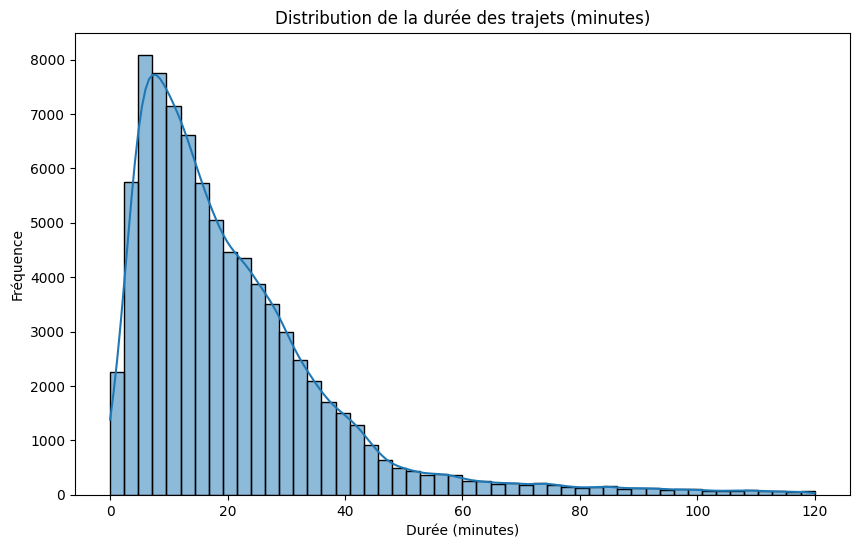

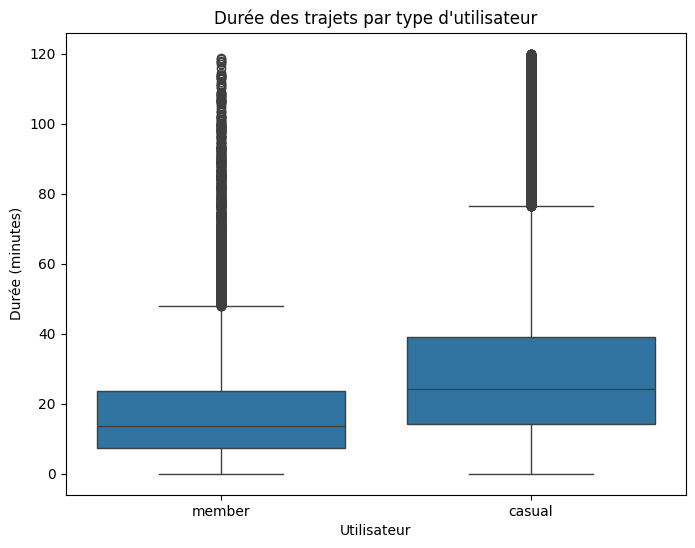

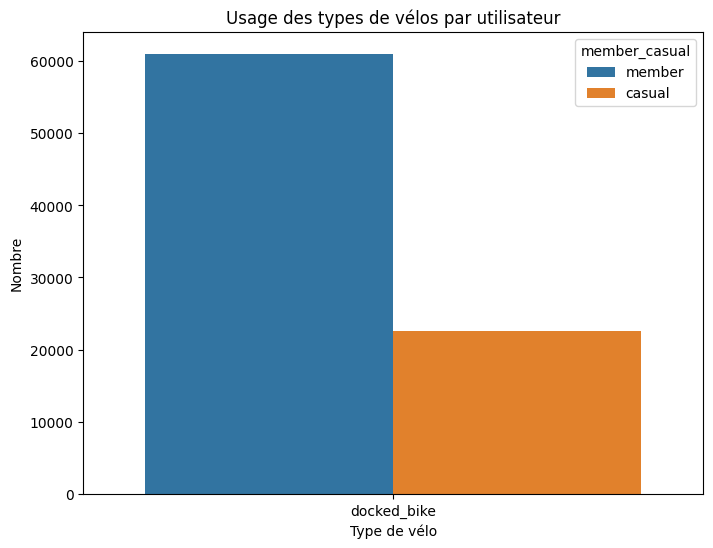

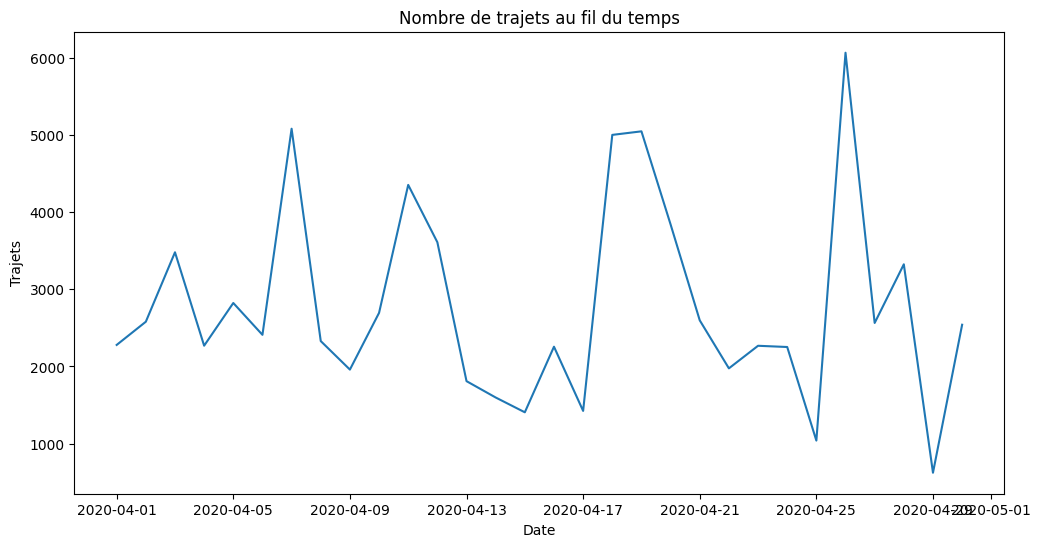

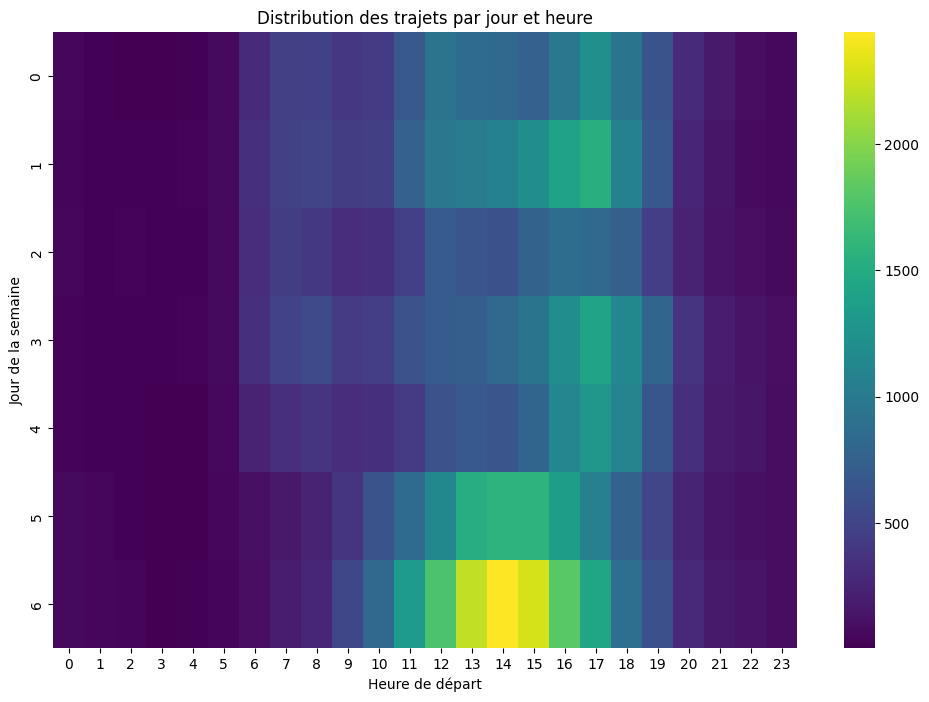

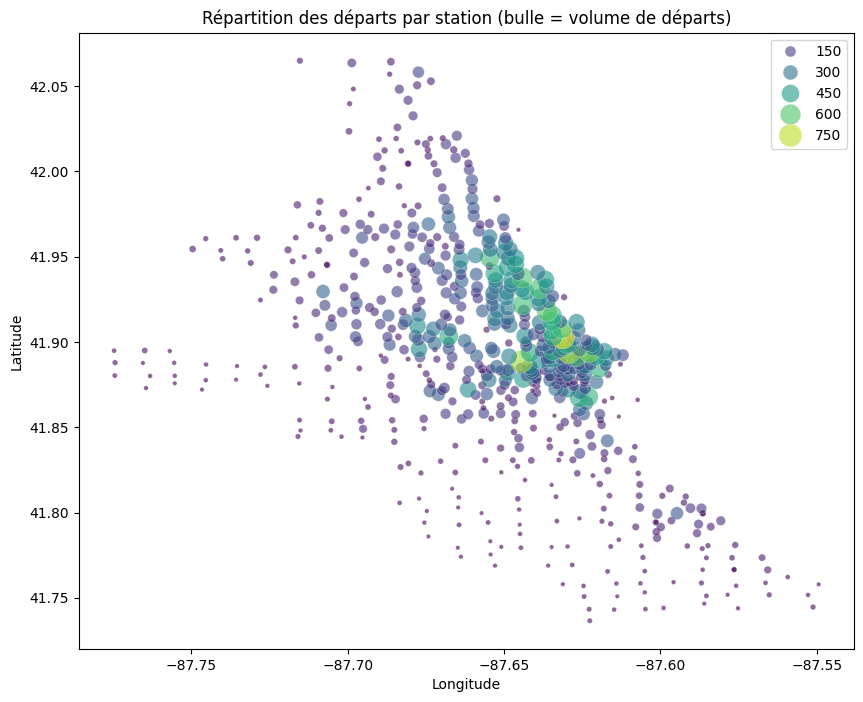

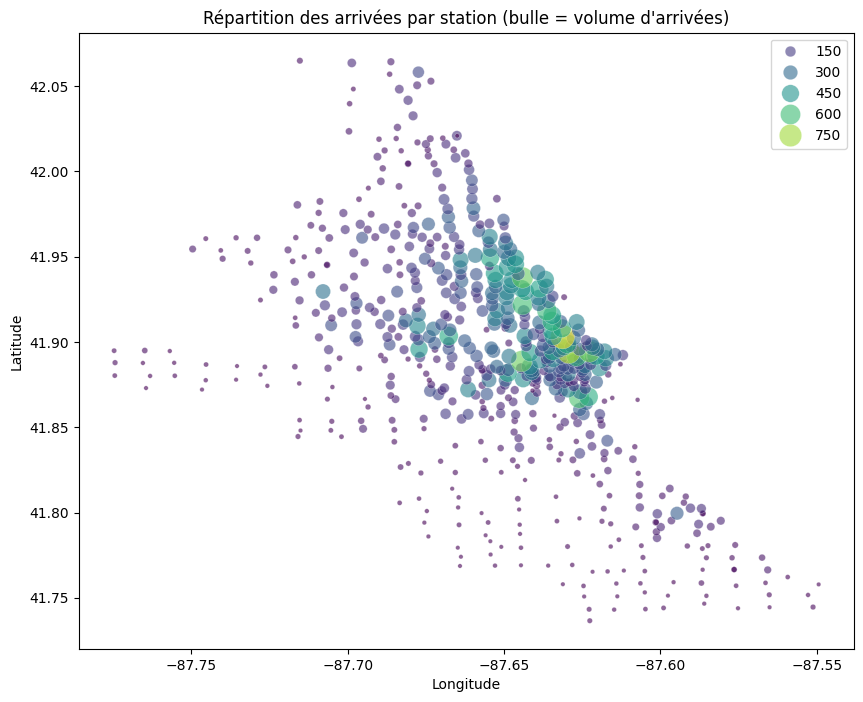

<ipython-input-9-bfaab4682615>:229: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_start.index, y=top_start.values, palette='viridis')


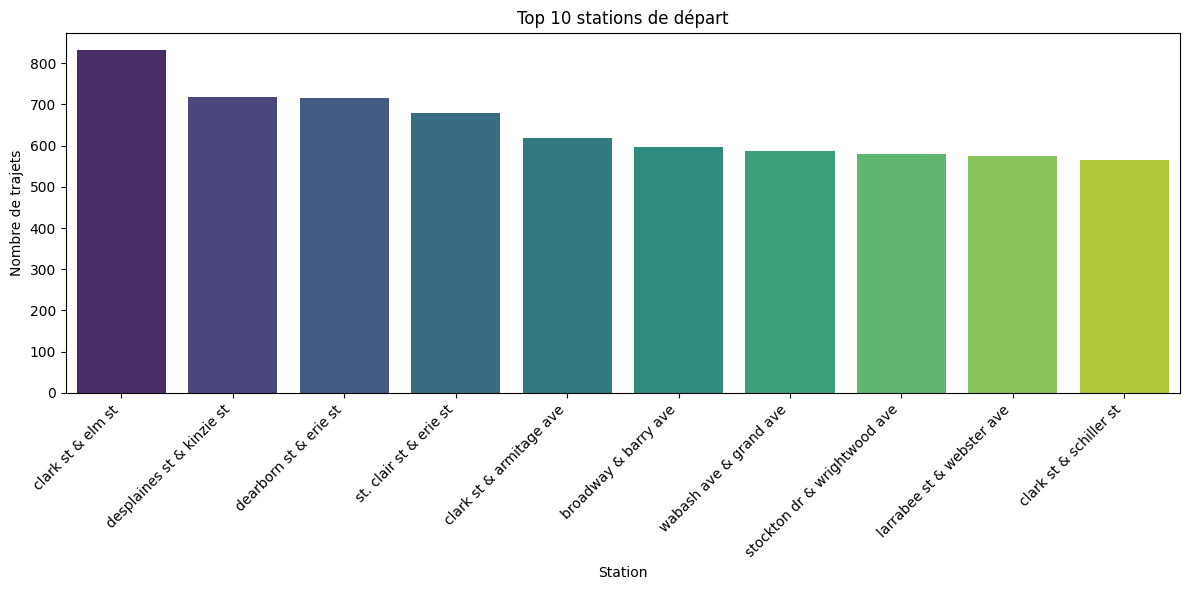

<ipython-input-9-bfaab4682615>:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_end.index, y=top_end.values, palette='magma')


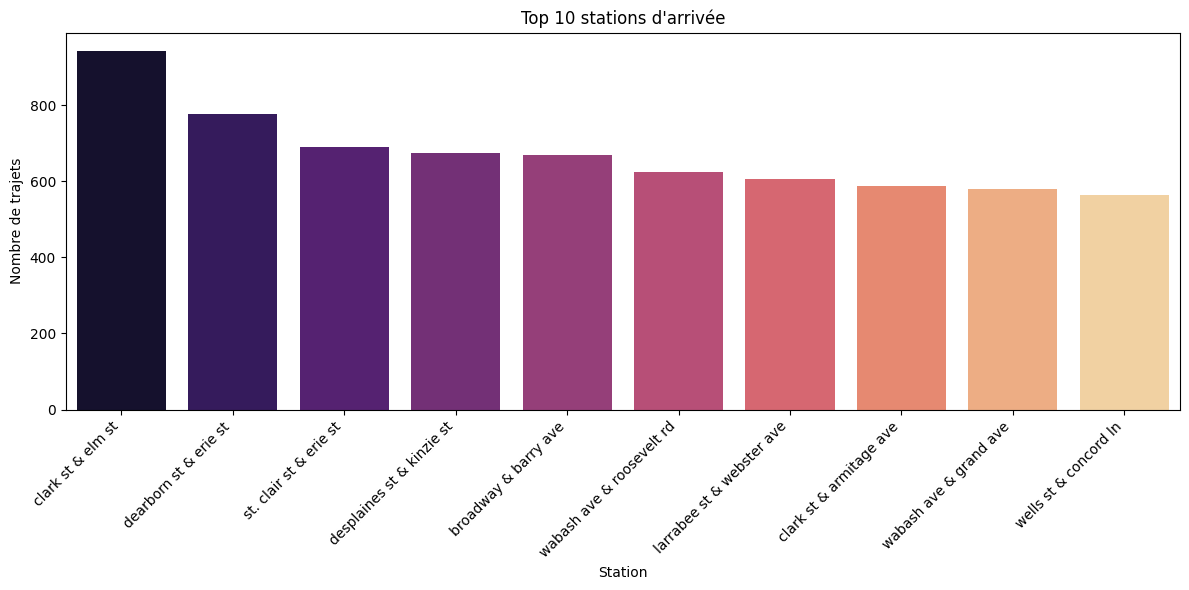

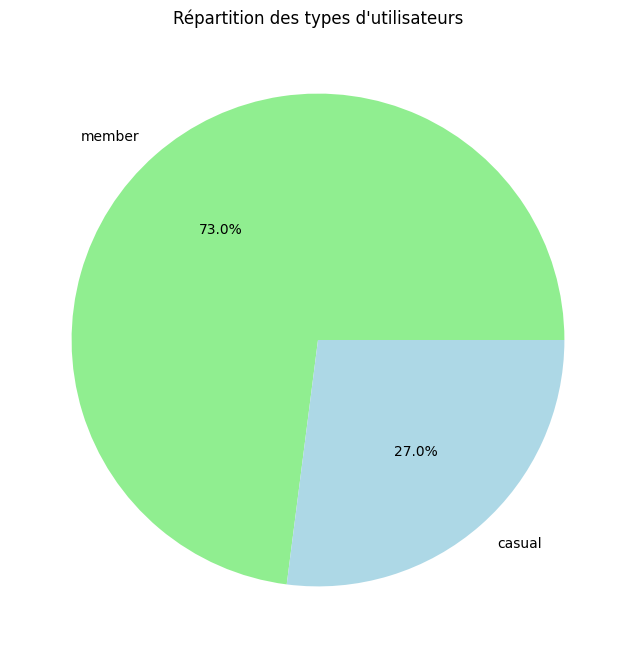

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Chargement et exploration initiale
def load_and_explore_data(file_path):
    try:
        df = pd.read_csv(file_path, low_memory=False)
        print("Aperçu des 5 premières lignes:")
        print(df.head())
        print("\nShape du DataFrame:", df.shape)
        print("\nTypes de données:\n", df.dtypes)
        print("\nStatistiques descriptives:\n", df.describe())
        # Analyse rapide des colonnes pertinentes si elles existent
        for col in ['rideable_type', 'member_casual', 'start_station_name', 'end_station_name']:
            if col in df.columns:
                print(f"\nValeurs uniques dans '{col}':\n", df[col].unique())
                print(f"Répartition dans '{col}':\n", df[col].value_counts())
        print("\nNombre de valeurs manquantes par colonne:\n", df.isnull().sum())
        return df
    except FileNotFoundError:
        print(f"Erreur : le fichier '{file_path}' n'a pas été trouvé.")
        return None
    except Exception as e:
        print(f"Erreur inattendue lors du chargement : {e}")
        return None

# 2. Nettoyage des données
def clean_data(df):
    # Uniformiser les noms de colonnes
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Conversion des colonnes dates (si présentes)
    for col in ['started_at', 'ended_at']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    df = df.dropna(subset=['started_at', 'ended_at'])  # Supprime les lignes avec dates invalides

    # Traitement des valeurs manquantes
    for col in ['start_station_name', 'end_station_name']:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)
    for col in ['start_lat', 'start_lng', 'end_lat', 'end_lng']:
        if col in df.columns:
            df[col].fillna(df[col].mean(), inplace=True)

    # Mise en minuscule pour certaines colonnes
    for col in ['start_station_name', 'end_station_name']:
        if col in df.columns:
            df[col] = df[col].str.lower()

    # Suppression des doublons
    df.drop_duplicates(inplace=True)

    return df

# 3. Enrichissement des données (feature engineering)
def feature_engineering(df):
    # Calcul de la durée du trajet en minutes
    df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

    # Exclure les trajets négatifs et ceux de plus de 120 minutes
    df = df[(df['trip_duration'] >= 0) & (df['trip_duration'] <= 120)]

    # Extraction de caractéristiques temporelles
    df['day_of_week'] = df['started_at'].dt.dayofweek
    df['hour_of_day'] = df['started_at'].dt.hour

    # Calcul de la distance avec la formule de Haversine
    def haversine_distance(lat1, lon1, lat2, lon2):
        R = 6371  # Rayon de la Terre en km
        dlat = np.radians(lat2 - lat1)
        dlon = np.radians(lon2 - lon1)
        a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        return R * c
    if set(['start_lat','start_lng','end_lat','end_lng']).issubset(df.columns):
        df['trip_distance'] = haversine_distance(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])
    else:
        df['trip_distance'] = np.nan

    # Catégorisation de la durée du trajet
    def categorize_duration(duration):
        if duration <= 15:
            return 'short'
        elif duration <= 45:
            return 'medium'
        else:
            return 'long'
    df['trip_duration_category'] = df['trip_duration'].apply(categorize_duration)

    return df

# 4. Préparation des données pour l'entraînement
def prepare_data_for_training(df):
    # Division des données : 70% entraînement, 15% validation, 15% test
    stratify_col = df['member_casual'] if 'member_casual' in df.columns else None
    train_df, temp_df = train_test_split(df, train_size=0.7, random_state=42, stratify=stratify_col)
    stratify_temp = temp_df['member_casual'] if stratify_col is not None else None
    validation_df, test_df = train_test_split(temp_df, train_size=0.5, random_state=42, stratify=stratify_temp)

    # Identification des caractéristiques
    numerical_features = ['trip_duration', 'hour_of_day', 'trip_distance']
    categorical_features = ['member_casual', 'rideable_type', 'day_of_week', 'trip_duration_category', 'start_station_name', 'end_station_name']

    # Standardisation des caractéristiques numériques
    scaler = StandardScaler()
    train_num = scaler.fit_transform(train_df[numerical_features])
    validation_num = scaler.transform(validation_df[numerical_features])
    test_num = scaler.transform(test_df[numerical_features])

    # Encodage one-hot pour les caractéristiques catégorielles
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    train_cat = encoder.fit_transform(train_df[categorical_features])
    validation_cat = encoder.transform(validation_df[categorical_features])
    test_cat = encoder.transform(test_df[categorical_features])

    # Fusionner les deux types de features
    X_train = np.concatenate([train_num, train_cat], axis=1)
    X_validation = np.concatenate([validation_num, validation_cat], axis=1)
    X_test = np.concatenate([test_num, test_cat], axis=1)

    # Sauvegarde optionnelle des jeux préparés
    pd.DataFrame(X_train).to_csv('train_prepared.csv', index=False)
    pd.DataFrame(X_validation).to_csv('validation_prepared.csv', index=False)
    pd.DataFrame(X_test).to_csv('test_prepared.csv', index=False)

    return train_df, validation_df, test_df, X_train, X_validation, X_test

# 5. Visualisations
def create_visualizations(df):
    # Histogramme de la durée des trajets
    plt.figure(figsize=(10, 6))
    sns.histplot(df['trip_duration'], bins=50, kde=True)
    plt.title('Distribution de la durée des trajets (minutes)')
    plt.xlabel('Durée (minutes)')
    plt.ylabel('Fréquence')
    plt.show()

    # Boxplot de la durée par type d'utilisateur
    if 'member_casual' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='member_casual', y='trip_duration', data=df)
        plt.title('Durée des trajets par type d\'utilisateur')
        plt.xlabel('Utilisateur')
        plt.ylabel('Durée (minutes)')
        plt.show()

    # Countplot du type de vélo par type d'utilisateur
    if 'rideable_type' in df.columns and 'member_casual' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x='rideable_type', data=df, hue='member_casual')
        plt.title('Usage des types de vélos par utilisateur')
        plt.xlabel('Type de vélo')
        plt.ylabel('Nombre')
        plt.show()

    # Évolution du nombre de trajets dans le temps
    if 'started_at' in df.columns:
        plt.figure(figsize=(12, 6))
        df['date'] = df['started_at'].dt.date
        df.groupby('date').size().plot()
        plt.title('Nombre de trajets au fil du temps')
        plt.xlabel('Date')
        plt.ylabel('Trajets')
        plt.show()

    # Heatmap des trajets par jour et heure (si ride_id existe)
    if set(['day_of_week', 'hour_of_day']).issubset(df.columns) and 'ride_id' in df.columns:
        trips_by_day_hour = df.groupby(['day_of_week', 'hour_of_day'])['ride_id'].count().unstack()
        plt.figure(figsize=(12, 8))
        sns.heatmap(trips_by_day_hour, cmap='viridis')
        plt.title('Distribution des trajets par jour et heure')
        plt.xlabel('Heure de départ')
        plt.ylabel('Jour de la semaine')
        plt.show()

    # Distribution spatiale des départs (bubble plot)
    if set(['start_lat','start_lng']).issubset(df.columns):
        dep_counts = df.groupby(['start_lat','start_lng']).size().reset_index(name='count')
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            x='start_lng', y='start_lat',
            data=dep_counts,
            size='count',
            hue='count',
            palette='viridis',
            sizes=(10,300),  # Ajuste l'échelle des bulles
            alpha=0.6,
            legend='brief'
        )
        plt.title('Répartition des départs par station (bulle = volume de départs)')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend(loc='upper right')
        plt.show()

    # Distribution spatiale des arrivées (bubble plot)
    if set(['end_lat','end_lng']).issubset(df.columns):
        arr_counts = df.groupby(['end_lat','end_lng']).size().reset_index(name='count')
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            x='end_lng', y='end_lat',
            data=arr_counts,
            size='count',
            hue='count',
            palette='viridis',
            sizes=(10,300),
            alpha=0.6,
            legend='brief'
        )
        plt.title('Répartition des arrivées par station (bulle = volume d\'arrivées)')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend(loc='upper right')
        plt.show()

    # Bar charts pour les top 10 stations de départ et d'arrivée
    if 'start_station_name' in df.columns and 'end_station_name' in df.columns:
        top_start = df['start_station_name'].value_counts().head(10)
        top_end = df['end_station_name'].value_counts().head(10)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=top_start.index, y=top_start.values, palette='viridis')
        plt.title('Top 10 stations de départ')
        plt.xlabel('Station')
        plt.ylabel('Nombre de trajets')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(12, 6))
        sns.barplot(x=top_end.index, y=top_end.values, palette='magma')
        plt.title('Top 10 stations d\'arrivée')
        plt.xlabel('Station')
        plt.ylabel('Nombre de trajets')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # Diagramme circulaire de la répartition des utilisateurs
    if 'member_casual' in df.columns:
        user_counts = df['member_casual'].value_counts()
        plt.figure(figsize=(8, 8))
        plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
        plt.title('Répartition des types d\'utilisateurs')
        plt.show()

def main():
    file_path = '202004-divvy-tripdata.csv'
    df = load_and_explore_data(file_path)
    if df is None:
        return

    df = clean_data(df)
    df = feature_engineering(df)

    # Sauvegarde des données nettoyées et enrichies
    df.to_csv('wrangled_data.csv', index=False)
    print("Données nettoyées et enrichies sauvegardées dans 'wrangled_data.csv'.")

    # Préparation des données pour l'entraînement (split et préparation des features)
    train_df, validation_df, test_df, X_train, X_validation, X_test = prepare_data_for_training(df)

    # Création des visualisations
    create_visualizations(df)

if __name__ == "__main__":
    main()


<ipython-input-17-6da5c592a667>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-17-6da5c592a667>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

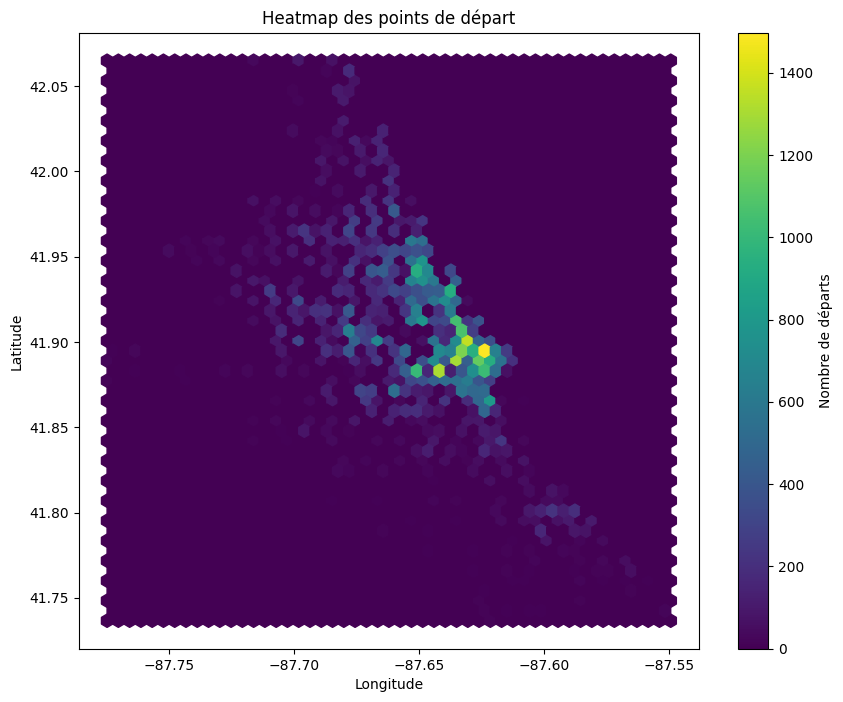

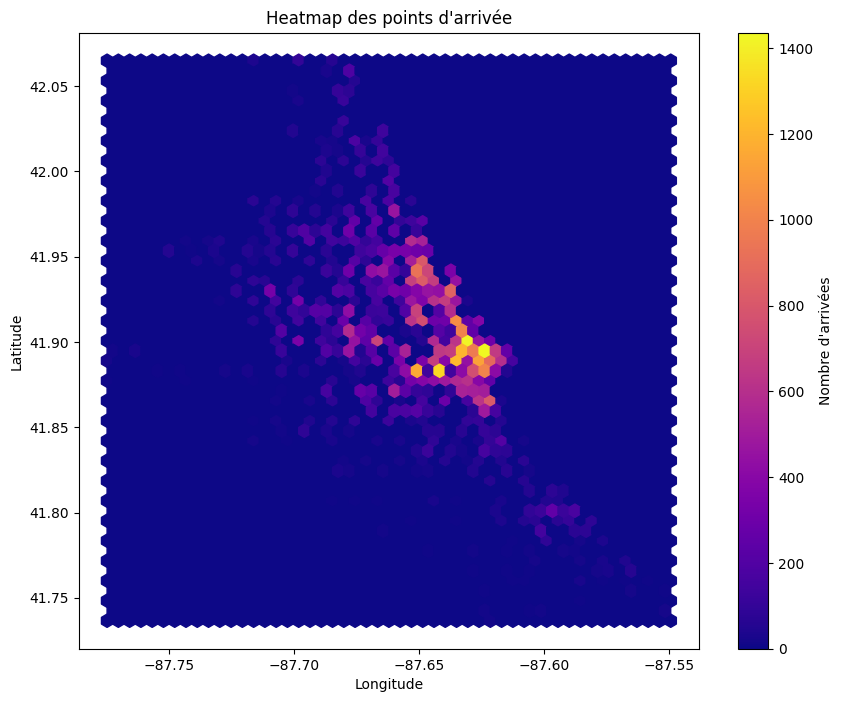

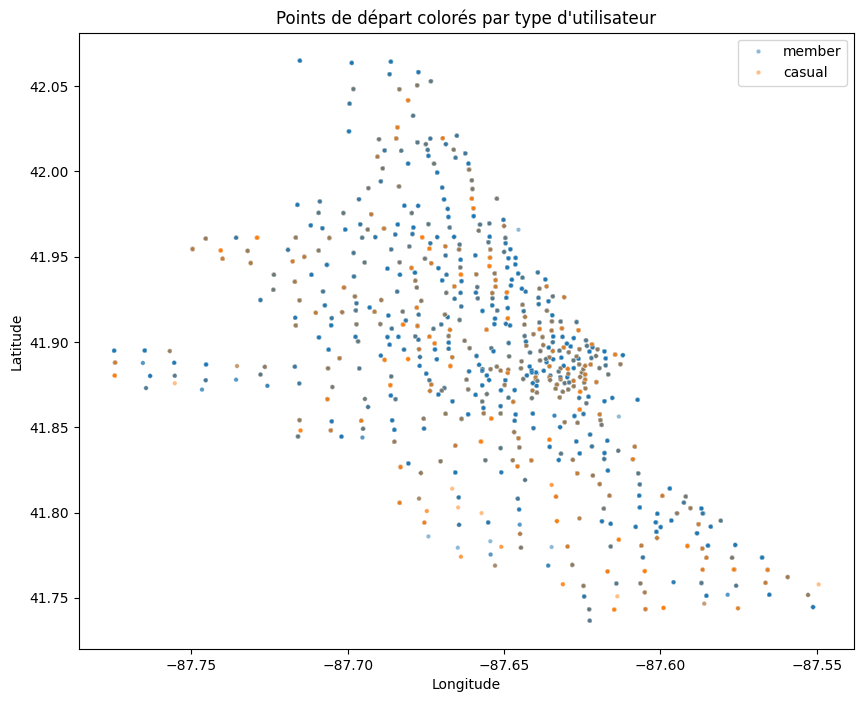

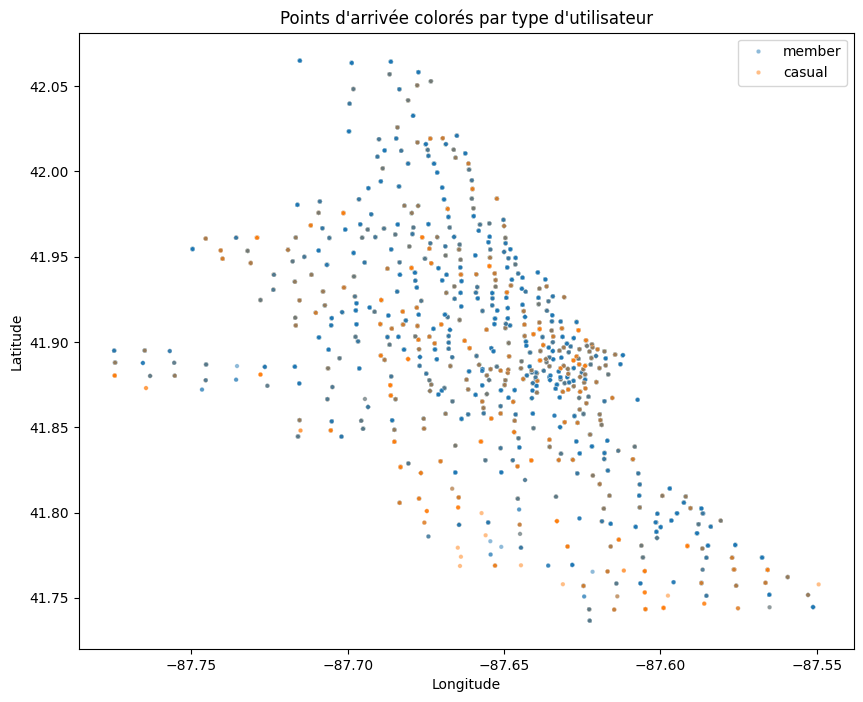

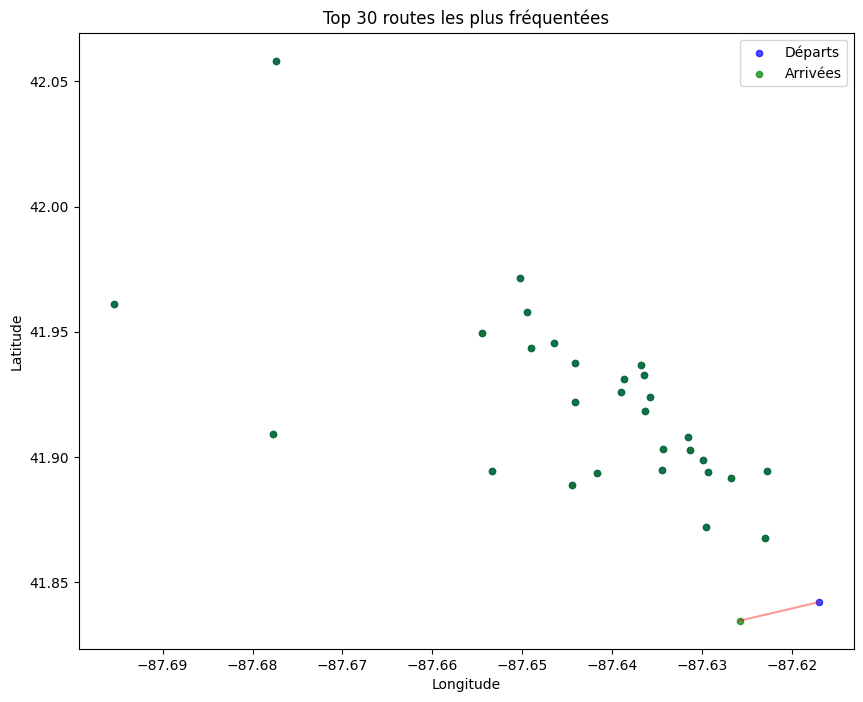

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Chargement des données (sans affichage)
def load_and_explore_data(file_path):
    try:
        df = pd.read_csv(file_path, low_memory=False)
        return df
    except FileNotFoundError:
        print(f"Erreur : le fichier '{file_path}' n'a pas été trouvé.")
        return None
    except Exception as e:
        print(f"Erreur inattendue lors du chargement : {e}")
        return None

# 2. Nettoyage des données
def clean_data(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Conversion en datetime
    for col in ['started_at', 'ended_at']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    df.dropna(subset=['started_at', 'ended_at'], inplace=True)

    # Valeurs manquantes
    for col in ['start_station_name', 'end_station_name']:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)
    for col in ['start_lat', 'start_lng', 'end_lat', 'end_lng']:
        if col in df.columns:
            df[col].fillna(df[col].mean(), inplace=True)

    # Mise en minuscule
    for col in ['start_station_name', 'end_station_name']:
        if col in df.columns:
            df[col] = df[col].str.lower()

    # Suppression doublons
    df.drop_duplicates(inplace=True)

    return df

# 3. Feature engineering
def feature_engineering(df):
    # Durée du trajet (minutes)
    df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

    # Exclusion trajets négatifs ou > 120 min
    df = df[(df['trip_duration'] >= 0) & (df['trip_duration'] <= 120)]

    # Caractéristiques temporelles
    df['day_of_week'] = df['started_at'].dt.dayofweek
    df['hour_of_day'] = df['started_at'].dt.hour

    # Distance via Haversine
    def haversine_distance(lat1, lon1, lat2, lon2):
        R = 6371
        dlat = np.radians(lat2 - lat1)
        dlon = np.radians(lon2 - lon1)
        a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        return R * c

    if {'start_lat','start_lng','end_lat','end_lng'}.issubset(df.columns):
        df['trip_distance'] = haversine_distance(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])
    else:
        df['trip_distance'] = np.nan

    # Catégories de durée
    def categorize_duration(duration):
        if duration <= 15:
            return 'short'
        elif duration <= 45:
            return 'medium'
        else:
            return 'long'
    df['trip_duration_category'] = df['trip_duration'].apply(categorize_duration)

    return df

# 4. Préparation des données (split + encodage)
def prepare_data_for_training(df):
    stratify_col = df['member_casual'] if 'member_casual' in df.columns else None
    train_df, temp_df = train_test_split(df, train_size=0.7, random_state=42, stratify=stratify_col)
    stratify_temp = temp_df['member_casual'] if stratify_col is not None else None
    validation_df, test_df = train_test_split(temp_df, train_size=0.5, random_state=42, stratify=stratify_temp)

    numerical_features = ['trip_duration', 'hour_of_day', 'trip_distance']
    categorical_features = ['member_casual', 'rideable_type', 'day_of_week',
                            'trip_duration_category', 'start_station_name', 'end_station_name']

    scaler = StandardScaler()
    train_num = scaler.fit_transform(train_df[numerical_features])
    validation_num = scaler.transform(validation_df[numerical_features])
    test_num = scaler.transform(test_df[numerical_features])

    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    train_cat = encoder.fit_transform(train_df[categorical_features])
    validation_cat = encoder.transform(validation_df[categorical_features])
    test_cat = encoder.transform(test_df[categorical_features])

    X_train = np.concatenate([train_num, train_cat], axis=1)
    X_validation = np.concatenate([validation_num, validation_cat], axis=1)
    X_test = np.concatenate([test_num, test_cat], axis=1)

    # Sauvegarde optionnelle
    pd.DataFrame(X_train).to_csv('train_prepared.csv', index=False)
    pd.DataFrame(X_validation).to_csv('validation_prepared.csv', index=False)
    pd.DataFrame(X_test).to_csv('test_prepared.csv', index=False)

    return train_df, validation_df, test_df, X_train, X_validation, X_test

# 5. Graphiques à base de points uniquement
def create_point_charts(df):
    """
    1) Heatmap départs
    2) Heatmap arrivées
    3) Scatter départs par type d'utilisateur
    4) Scatter arrivées par type d'utilisateur
    5) Lignes reliant les routes les plus empruntées
    """

    # 1) Heatmap départs
    if {'start_lat','start_lng'}.issubset(df.columns):
        plt.figure(figsize=(10, 8))
        plt.hexbin(df['start_lng'], df['start_lat'], gridsize=50, cmap='viridis')
        plt.colorbar(label='Nombre de départs')
        plt.title('Heatmap des points de départ')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

    # 2) Heatmap arrivées
    if {'end_lat','end_lng'}.issubset(df.columns):
        plt.figure(figsize=(10, 8))
        plt.hexbin(df['end_lng'], df['end_lat'], gridsize=50, cmap='plasma')
        plt.colorbar(label='Nombre d\'arrivées')
        plt.title('Heatmap des points d\'arrivée')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

    # 3) Scatter départs par type d'utilisateur
    if {'start_lat','start_lng','member_casual'}.issubset(df.columns):
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            x='start_lng', y='start_lat',
            data=df,
            hue='member_casual',
            s=10,
            alpha=0.5
        )
        plt.title('Points de départ colorés par type d\'utilisateur')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()
        plt.show()

    # 4) Scatter arrivées par type d'utilisateur
    if {'end_lat','end_lng','member_casual'}.issubset(df.columns):
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            x='end_lng', y='end_lat',
            data=df,
            hue='member_casual',
            s=10,
            alpha=0.5
        )
        plt.title('Points d\'arrivée colorés par type d\'utilisateur')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()
        plt.show()

    # 5) Routes les plus empruntées
    if {'start_lat','start_lng','end_lat','end_lng'}.issubset(df.columns):
        routes = df.groupby(['start_lat','start_lng','end_lat','end_lng']).size().reset_index(name='count')
        routes = routes.sort_values('count', ascending=False).head(30)

        plt.figure(figsize=(10, 8))
        for _, row in routes.iterrows():
            plt.plot(
                [row['start_lng'], row['end_lng']],
                [row['start_lat'], row['end_lat']],
                alpha=0.4,
                color='red'
            )
        plt.scatter(routes['start_lng'], routes['start_lat'], color='blue', s=20, alpha=0.7, label='Départs')
        plt.scatter(routes['end_lng'], routes['end_lat'], color='green', s=20, alpha=0.7, label='Arrivées')

        plt.title('Top 30 routes les plus fréquentées')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()
        plt.show()

def main():
    file_path = '202004-divvy-tripdata.csv'
    df = load_and_explore_data(file_path)
    if df is None:
        return

    df = clean_data(df)
    df = feature_engineering(df)

    df.to_csv('wrangled_data.csv', index=False)

    train_df, validation_df, test_df, X_train, X_validation, X_test = prepare_data_for_training(df)

    # Affiche uniquement les graphiques à base de points
    create_point_charts(df)

if __name__ == "__main__":
    main()


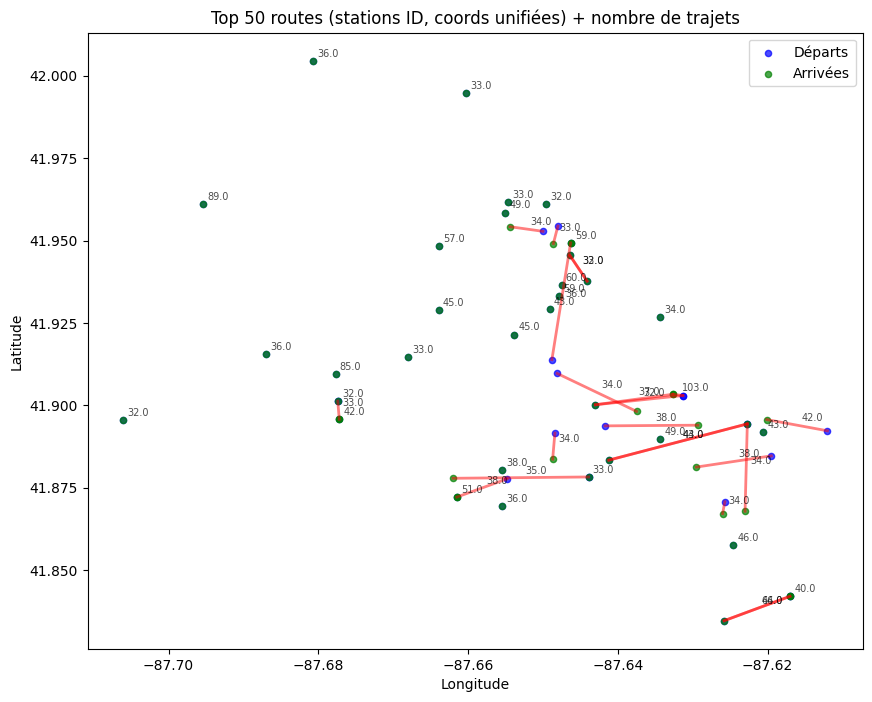


=== Station IDs ===
ID 1 : 2112 w peterson ave
ID 2 : 63rd st beach
ID 3 : 900 w harrison st
ID 4 : aberdeen st & jackson blvd
ID 5 : aberdeen st & monroe st
ID 6 : aberdeen st & randolph st
ID 7 : ada st & washington blvd
ID 8 : adler planetarium
ID 9 : albany ave & 26th st
ID 10 : albany ave & bloomingdale ave
ID 11 : albany ave & montrose ave
ID 12 : archer (damen) ave & 37th st
ID 13 : artesian ave & hubbard st
ID 14 : ashland ave & 13th st
ID 15 : ashland ave & 50th st
ID 16 : ashland ave & 63rd st
ID 17 : ashland ave & 66th st
ID 18 : ashland ave & 69th st
ID 19 : ashland ave & archer ave
ID 20 : ashland ave & augusta blvd
ID 21 : ashland ave & belle plaine ave
ID 22 : ashland ave & blackhawk st
ID 23 : ashland ave & chicago ave
ID 24 : ashland ave & division st
ID 25 : ashland ave & garfield blvd
ID 26 : ashland ave & grace st
ID 27 : ashland ave & grand ave
ID 28 : ashland ave & lake st
ID 29 : ashland ave & mcdowell ave
ID 30 : ashland ave & pershing rd
ID 31 : ashland ave & 

In [ ]:
#@title Top 50 routes avec coordonnées unifiées, ID stations et affichage du nombre de trajets (avec décalage)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def unify_coordinates(df):
    """
    Unifie les coordonnées (lat, lng) pour chaque station :
    - On calcule la moyenne (lat, lng) pour chaque start_station_name et end_station_name.
    - On remplace les coordonnées originales par ces moyennes.
    """
    mean_start_coords = df.groupby('start_station_name')[['start_lat','start_lng']].mean()
    df = df.merge(mean_start_coords, on='start_station_name', suffixes=('', '_meanstart'))
    df['start_lat'] = df['start_lat_meanstart']
    df['start_lng'] = df['start_lng_meanstart']
    df.drop(['start_lat_meanstart','start_lng_meanstart'], axis=1, inplace=True)

    mean_end_coords = df.groupby('end_station_name')[['end_lat','end_lng']].mean()
    df = df.merge(mean_end_coords, on='end_station_name', suffixes=('', '_meanend'))
    df['end_lat'] = df['end_lat_meanend']
    df['end_lng'] = df['end_lng_meanend']
    df.drop(['end_lat_meanend','end_lng_meanend'], axis=1, inplace=True)

    return df

def assign_station_ids(df):
    """
    Crée un mapping station_name -> ID numérique et remplace
    les noms dans le DataFrame par ces IDs (start_station_id, end_station_id).
    Retourne le df modifié et le dictionnaire station_mapping.
    """
    all_stations = set(df['start_station_name'].unique()) | set(df['end_station_name'].unique())
    station_mapping = {name: i+1 for i, name in enumerate(sorted(all_stations))}

    df['start_station_id'] = df['start_station_name'].map(station_mapping)
    df['end_station_id'] = df['end_station_name'].map(station_mapping)

    return df, station_mapping

def plot_top_50_routes_station_ids(df):
    """
    Trace les 50 trajets les plus empruntés avec des IDs de stations,
    en ignorant les trajets start = end.
    Lignes plus épaisses et affichage du nombre de trajets (count) avec un léger décalage.
    """
    needed = {
        'start_lat','start_lng','end_lat','end_lng',
        'start_station_id','end_station_id'
    }
    if not needed.issubset(df.columns):
        print("Colonnes manquantes pour tracer les routes (coords + IDs).")
        return

    # Filtrer pour écarter les trajets où la station de départ == station d'arrivée
    df_filtered = df[
        (df['start_station_id'] != df['end_station_id']) |
        (df['start_lat'] != df['end_lat']) |
        (df['start_lng'] != df['end_lng'])
    ]

    routes = (
        df_filtered.groupby([
            'start_station_id','end_station_id',
            'start_lat','start_lng',
            'end_lat','end_lng'
        ])
        .size()
        .reset_index(name='count')
        .sort_values('count', ascending=False)
        .head(50)
    )

    plt.figure(figsize=(10, 8))

    for _, row in routes.iterrows():
        # Tracé de la ligne
        plt.plot(
            [row['start_lng'], row['end_lng']],
            [row['start_lat'], row['end_lat']],
            alpha=0.5,
            color='red',
            linewidth=2
        )
        # On place le label (count) avec un léger décalage (offset)
        mid_lng = (row['start_lng'] + row['end_lng']) / 2
        mid_lat = (row['start_lat'] + row['end_lat']) / 2

        plt.annotate(
            text=str(row['count']),
            xy=(mid_lng, mid_lat),
            xytext=(3, 3),           # Décalage en points (x, y)
            textcoords='offset points',
            fontsize=7,
            alpha=0.7
        )

    # Points de départ (bleu) et d'arrivée (vert)
    plt.scatter(
        routes['start_lng'], routes['start_lat'],
        color='blue', s=20, alpha=0.7, label='Départs'
    )
    plt.scatter(
        routes['end_lng'], routes['end_lat'],
        color='green', s=20, alpha=0.7, label='Arrivées'
    )

    plt.title('Top 50 routes (stations ID, coords unifiées) + nombre de trajets')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

# --- EXÉCUTION DE LA CELLULE ---
df = pd.read_csv('wrangled_data.csv')
df = unify_coordinates(df)
df, station_mapping = assign_station_ids(df)
plot_top_50_routes_station_ids(df)

# (Optionnel) Afficher le mapping station => ID
print("\n=== Station IDs ===")
for st_name, st_id in sorted(station_mapping.items(), key=lambda x: x[1]):
    print(f"ID {st_id} : {st_name}")
